## Surgical Tool Detection

###### Identify all surgical tools that are present in an image.

<img src="tool_name.jpg">

### Load the packages

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys

%matplotlib inline

In [2]:
sys.path.insert(0, 'utils')

from prepare_data import *
from visualize_data import *

## Data Prepration

## Training Data

### Read video files and write frames in a directory

In [3]:
filepath = 'data/m2cai16-tool/train_dataset/'
filenames = ['tool_vedio_01', 'tool_vedio_02', 'tool_vedio_03', 'tool_vedio_04', 'tool_vedio_05', 'tool_vedio_06',\
             'tool_vedio_07', 'tool_vedio_08', 'tool_vedio_09', 'tool_vedio_10']
paths = ['data/m2cai16-tool/train_dataset/tool_video_01.mp4', 'data/m2cai16-tool/train_dataset/tool_video_02.mp4',\
         'data/m2cai16-tool/train_dataset/tool_video_03.mp4', 'data/m2cai16-tool/train_dataset/tool_video_04.mp4',\
         'data/m2cai16-tool/train_dataset/tool_video_05.mp4', 'data/m2cai16-tool/train_dataset/tool_video_06.mp4',\
         'data/m2cai16-tool/train_dataset/tool_video_07.mp4', 'data/m2cai16-tool/train_dataset/tool_video_08.mp4',\
         'data/m2cai16-tool/train_dataset/tool_video_09.mp4', 'data/m2cai16-tool/train_dataset/tool_video_10.mp4']

#for filename,path in zip(filenames,paths):
    #video2frame(filepath, filename, path, 25) ; # Need first time when you write frames from video in your local path

### Display Video

In [4]:
video_number = 0
#displayVideo(paths[video_number],25); # Uncomment when you need to display the particular video

### Load the images(or frames)

In [5]:
# images : list of all require training frames
#images = loadImages(filepath); # uncomment when you required. It will take somet time. 

In [6]:
#print("Number of images: "+str(len(images)))

### Read the text labels files

In [4]:
# Read tool_video_01.txt
filename = 'tool_video_01'
tool_video_01_df = readTextFile(filepath, filename)
tool_video_01_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        0        0     0         0        0          0            0
1     25        0        0     0         0        0          0            0
2     50        0        0     0         0        0          0            0
3     75        0        0     0         0        0          0            0
4    100        0        0     0         0        0          0            0

In [5]:
# Statics
# Read tool_video_01.txt
tool_video_01_df.describe()

Frame      Grasper      Bipolar         Hook     Scissors  \
count   2354.000000  2354.000000  2354.000000  2354.000000  2354.000000   
mean   29412.500000     0.746814     0.008071     0.665251     0.021240   
std    16992.139727     0.434929     0.089496     0.472003     0.144216   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%    14706.250000     0.000000     0.000000     0.000000     0.000000   
50%    29412.500000     1.000000     0.000000     1.000000     0.000000   
75%    44118.750000     1.000000     0.000000     1.000000     0.000000   
max    58825.000000     1.000000     1.000000     1.000000     1.000000   

           Clipper  Irrigator  SpecimenBag  
count  2354.000000     2354.0  2354.000000  
mean      0.021665        0.0     0.056500  
std       0.145619        0.0     0.230933  
min       0.000000        0.0     0.000000  
25%       0.000000        0.0     0.000000  
50%       0.000000        0.0     0.000000  
75%       0.000000        0.0     0.000000  
max       1.000000        0.0     1.000000

In [6]:
# Read tool_video_01_pred.txt
filename = 'tool_video_01_pred'
tool_video_01_pred_df = readTextFile(filepath, filename)
tool_video_01_pred_df.head()

Frame  Grasper  Bipolar     Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0  -1.5348 -3.06890  2.82340   -0.9753 -3.35330   -2.87720     -1.20330
1     25   2.8949  1.04430  0.38031   -3.6901  4.56470   -0.74929     -3.16980
2     50  -2.6808  1.33770  0.70140   -2.6383  0.20482   -4.27110      0.21033
3     75  -1.6789  0.20425  1.33470    1.3916  2.69920    2.79680     -3.24560
4    100  -3.6236 -1.92610 -2.58290   -4.9936 -3.95330    1.33340     -4.25850

In [7]:
tool_video_01_pred_df.describe()

Frame      Grasper      Bipolar         Hook     Scissors  \
count   2354.000000  2354.000000  2354.000000  2354.000000  2354.000000   
mean   29412.500000    -0.067733    -0.081495    -0.005151     0.016679   
std    16992.139727     2.888347     2.890370     2.902895     2.957337   
min        0.000000    -4.992400    -4.998600    -4.997300    -4.996000   
25%    14706.250000    -2.600375    -2.540350    -2.549700    -2.620125   
50%    29412.500000    -0.168765    -0.230360     0.022455     0.018852   
75%    44118.750000     2.456100     2.455600     2.553450     2.665375   
max    58825.000000     4.998000     4.999400     4.997300     4.998700   

           Clipper    Irrigator  SpecimenBag  
count  2354.000000  2354.000000  2354.000000  
mean     -0.048805     0.011637     0.047412  
std       2.865095     2.882348     2.920695  
min      -4.999600    -4.999600    -4.994200  
25%      -2.547275    -2.426025    -2.468150  
50%       0.021226     0.068055     0.047957  
75%       2.397300     2.473450     2.600400  
max       4.994800     4.993200     4.995300

In [8]:
# Read tool_video_01_zeros.txt
filename = 'tool_video_01_zeros'
tool_video_01_zeros_df = readTextFile(filepath, filename)
tool_video_01_zeros_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        0        0     0         0        0          0            0
1     25        0        0     0         0        0          0            0
2     50        0        0     0         0        0          0            0
3     75        0        0     0         0        0          0            0
4    100        0        0     0         0        0          0            0

In [9]:
# Read tool_video_01_zeros.txt
filename = 'tool_video_02'
tool_video_02_df = readTextFile(filepath, filename)
tool_video_02_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        0        0     0         0        0          0            0
1     25        0        0     0         0        0          0            0
2     50        0        0     0         0        0          0            0
3     75        0        0     0         0        0          0            0
4    100        0        0     0         0        0          0            0

In [10]:
tool_video_02_df.describe()

Frame      Grasper      Bipolar         Hook     Scissors  \
count   1973.000000  1973.000000  1973.000000  1973.000000  1973.000000   
mean   24650.000000     0.352255     0.019260     0.524075     0.012671   
std    14242.508996     0.477794     0.137472     0.499547     0.111879   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%    12325.000000     0.000000     0.000000     0.000000     0.000000   
50%    24650.000000     0.000000     0.000000     1.000000     0.000000   
75%    36975.000000     1.000000     0.000000     1.000000     0.000000   
max    49300.000000     1.000000     1.000000     1.000000     1.000000   

           Clipper    Irrigator  SpecimenBag  
count  1973.000000  1973.000000  1973.000000  
mean      0.045616     0.061328     0.066396  
std       0.208703     0.239992     0.249037  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000

In [11]:
# Read tool_video_02_pred.txt
filename = 'tool_video_02_pred'
tool_video_02_pred_df = readTextFile(filepath, filename)
tool_video_02_pred_df.head()

Frame  Grasper  Bipolar    Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0  2.52930  -1.0799  2.2411 -4.030700   1.3196    4.09420      4.60980
1     25 -2.90090   2.1691  3.7523  2.122600  -1.8192   -2.22580      0.77949
2     50 -0.78017  -4.1737 -2.4308  3.907700   4.0281    2.52650     -2.37650
3     75 -0.94218  -4.2715  4.7978  0.039309  -2.7695   -2.74960     -3.73100
4    100 -3.18610  -1.0327  1.7425  3.033900   4.5706    0.83354      0.19936

In [12]:
tool_video_02_pred_df.describe()

Frame      Grasper      Bipolar         Hook     Scissors  \
count   1973.000000  1973.000000  1973.000000  1973.000000  1973.000000   
mean   24650.000000     0.040276     0.002741     0.036285    -0.025622   
std    14242.508996     2.862766     2.889435     2.844991     2.844293   
min        0.000000    -4.997500    -4.992600    -4.998800    -4.992600   
25%    12325.000000    -2.415700    -2.489300    -2.357200    -2.437400   
50%    24650.000000     0.028962     0.066753     0.166670    -0.089078   
75%    36975.000000     2.456100     2.502500     2.480500     2.406800   
max    49300.000000     4.990500     4.992500     4.990500     4.997500   

           Clipper    Irrigator  SpecimenBag  
count  1973.000000  1973.000000  1973.000000  
mean     -0.026069    -0.011941     0.014772  
std       2.900014     2.893734     2.884916  
min      -4.999300    -4.996700    -4.999300  
25%      -2.595700    -2.512500    -2.533300  
50%      -0.027566     0.037305     0.028910  
75%       2.433500     2.420900     2.487400  
max       4.994300     4.992800     4.997900

In [13]:
# Read tool_video_03.txt
filename = 'tool_video_03'
tool_video_03_df = readTextFile(filepath, filename)
tool_video_03_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        0        0     0         0        0          0            0
1     25        0        0     0         0        0          0            0
2     50        0        0     0         0        0          0            0
3     75        0        0     0         0        0          0            0
4    100        0        0     0         0        0          0            0

In [14]:
tool_video_03_df.describe()

Frame      Grasper  Bipolar         Hook     Scissors  \
count    4576.00000  4576.000000   4576.0  4576.000000  4576.000000   
mean    57187.50000     0.418051      0.0     0.737325     0.027753   
std     33028.04364     0.493292      0.0     0.440135     0.164284   
min         0.00000     0.000000      0.0     0.000000     0.000000   
25%     28593.75000     0.000000      0.0     0.000000     0.000000   
50%     57187.50000     0.000000      0.0     1.000000     0.000000   
75%     85781.25000     1.000000      0.0     1.000000     0.000000   
max    114375.00000     1.000000      0.0     1.000000     1.000000   

           Clipper  Irrigator  SpecimenBag  
count  4576.000000     4576.0  4576.000000  
mean      0.063374        0.0     0.050262  
std       0.243661        0.0     0.218509  
min       0.000000        0.0     0.000000  
25%       0.000000        0.0     0.000000  
50%       0.000000        0.0     0.000000  
75%       0.000000        0.0     0.000000  
max       1.000000        0.0     1.000000

In [15]:
# Read tool_video_04.txt
filename = 'tool_video_04'
tool_video_04_df = readTextFile(filepath, filename)
tool_video_04_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        0        0     0         0        0          0            0
1     25        0        0     0         0        0          0            0
2     50        1        0     0         0        0          0            0
3     75        1        0     0         0        0          0            0
4    100        1        0     0         0        0          0            0

In [16]:
tool_video_04_df.describe()

Frame     Grasper      Bipolar         Hook     Scissors  \
count   1195.000000  1195.00000  1195.000000  1195.000000  1195.000000   
mean   14925.000000     0.61841     0.091213     0.556485     0.019247   
std     8627.777331     0.48598     0.288033     0.497007     0.137449   
min        0.000000     0.00000     0.000000     0.000000     0.000000   
25%     7462.500000     0.00000     0.000000     0.000000     0.000000   
50%    14925.000000     1.00000     0.000000     1.000000     0.000000   
75%    22387.500000     1.00000     0.000000     1.000000     0.000000   
max    29850.000000     1.00000     1.000000     1.000000     1.000000   

           Clipper  Irrigator  SpecimenBag  
count  1195.000000     1195.0  1195.000000  
mean      0.047699        0.0     0.074477  
std       0.213217        0.0     0.262655  
min       0.000000        0.0     0.000000  
25%       0.000000        0.0     0.000000  
50%       0.000000        0.0     0.000000  
75%       0.000000        0.0     0.000000  
max       1.000000        0.0     1.000000

In [17]:
# Read tool_video_05.txt
filename = 'tool_video_05'
tool_video_05_df = readTextFile(filepath, filename)
tool_video_05_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        0        0     0         0        0          0            0
1     25        0        0     0         0        0          0            0
2     50        0        0     0         0        0          0            0
3     75        0        0     0         0        0          0            0
4    100        0        0     0         0        0          0            0

In [18]:
tool_video_05_df.describe()

Frame      Grasper  Bipolar         Hook     Scissors  \
count   2516.000000  2516.000000   2516.0  2516.000000  2516.000000   
mean   31437.500000     0.273052      0.0     0.719396     0.007552   
std    18161.274047     0.445616      0.0     0.449384     0.086589   
min        0.000000     0.000000      0.0     0.000000     0.000000   
25%    15718.750000     0.000000      0.0     0.000000     0.000000   
50%    31437.500000     0.000000      0.0     1.000000     0.000000   
75%    47156.250000     1.000000      0.0     1.000000     0.000000   
max    62875.000000     1.000000      0.0     1.000000     1.000000   

           Clipper  Irrigator  SpecimenBag  
count  2516.000000     2516.0  2516.000000  
mean      0.009141        0.0     0.095787  
std       0.095192        0.0     0.294357  
min       0.000000        0.0     0.000000  
25%       0.000000        0.0     0.000000  
50%       0.000000        0.0     0.000000  
75%       0.000000        0.0     0.000000  
max       1.000000        0.0     1.000000

In [19]:
# Read tool_video_06.txt
filename = 'tool_video_06'
tool_video_06_df = readTextFile(filepath, filename)
tool_video_06_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        0        0     0         0        0          0            0
1     25        0        0     0         0        0          0            0
2     50        0        0     0         0        0          0            0
3     75        0        0     0         0        0          0            0
4    100        0        0     0         0        0          0            0

In [20]:
tool_video_06_df.describe()

Frame      Grasper      Bipolar         Hook     Scissors  \
count   3107.000000  3107.000000  3107.000000  3107.000000  3107.000000   
mean   38825.000000     0.721918     0.072739     0.449308     0.005793   
std    22426.449229     0.448126     0.259749     0.497504     0.075906   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%    19412.500000     0.000000     0.000000     0.000000     0.000000   
50%    38825.000000     1.000000     0.000000     0.000000     0.000000   
75%    58237.500000     1.000000     0.000000     1.000000     0.000000   
max    77650.000000     1.000000     1.000000     1.000000     1.000000   

           Clipper    Irrigator  SpecimenBag  
count  3107.000000  3107.000000  3107.000000  
mean      0.016415     0.120373     0.062762  
std       0.127084     0.325450     0.242573  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000

In [21]:
# Read tool_video_07.txt
filename = 'tool_video_07'
tool_video_07_df = readTextFile(filepath, filename)
tool_video_07_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        0        0     0         0        0          0            0
1     25        0        0     0         0        0          0            0
2     50        0        0     0         0        0          0            0
3     75        0        0     0         0        0          0            0
4    100        0        0     0         0        0          0            0

In [22]:
tool_video_07_df.describe()

Frame      Grasper      Bipolar         Hook     Scissors  \
count   1357.000000  1357.000000  1357.000000  1357.000000  1357.000000   
mean   16950.000000     0.464996     0.042741     0.547531     0.032424   
std     9796.911716     0.498957     0.202348     0.497919     0.177190   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%     8475.000000     0.000000     0.000000     0.000000     0.000000   
50%    16950.000000     0.000000     0.000000     1.000000     0.000000   
75%    25425.000000     1.000000     0.000000     1.000000     0.000000   
max    33900.000000     1.000000     1.000000     1.000000     1.000000   

           Clipper    Irrigator  SpecimenBag  
count  1357.000000  1357.000000  1357.000000  
mean      0.032424     0.055269     0.082535  
std       0.177190     0.228589     0.275280  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000

In [23]:
# Read tool_video_08.txt
filename = 'tool_video_08'
tool_video_08_df = readTextFile(filepath, filename)
tool_video_08_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        1        0     0         0        0          0            0
1     25        1        0     0         0        0          0            0
2     50        1        0     0         0        0          0            0
3     75        1        0     0         0        0          0            0
4    100        1        0     0         0        0          0            0

In [24]:
tool_video_08_df.describe()

Frame      Grasper      Bipolar         Hook     Scissors  \
count   1635.000000  1635.000000  1635.000000  1635.000000  1635.000000   
mean   20425.000000     0.534557     0.113150     0.386544     0.023242   
std    11803.204014     0.498957     0.316873     0.487107     0.150716   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%    10212.500000     0.000000     0.000000     0.000000     0.000000   
50%    20425.000000     1.000000     0.000000     0.000000     0.000000   
75%    30637.500000     1.000000     0.000000     1.000000     0.000000   
max    40850.000000     1.000000     1.000000     1.000000     1.000000   

           Clipper    Irrigator  SpecimenBag  
count  1635.000000  1635.000000  1635.000000  
mean      0.033028     0.125382     0.058716  
std       0.178763     0.331253     0.235164  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000

In [25]:
# Read tool_video_09.txt
filename = 'tool_video_09'
tool_video_09_df = readTextFile(filepath, filename)
tool_video_09_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        0        0     0         0        0          0            0
1     25        0        0     0         0        0          0            0
2     50        0        0     0         0        0          0            0
3     75        0        0     0         0        0          0            0
4    100        0        0     0         0        0          0            0

In [26]:
tool_video_09_df.describe()

Frame      Grasper  Bipolar         Hook     Scissors  \
count   1924.000000  1924.000000   1924.0  1924.000000  1924.000000   
mean   24037.500000     0.296258      0.0     0.642931     0.007277   
std    13888.881944     0.456725      0.0     0.479260     0.085014   
min        0.000000     0.000000      0.0     0.000000     0.000000   
25%    12018.750000     0.000000      0.0     0.000000     0.000000   
50%    24037.500000     0.000000      0.0     1.000000     0.000000   
75%    36056.250000     1.000000      0.0     1.000000     0.000000   
max    48075.000000     1.000000      0.0     1.000000     1.000000   

           Clipper  Irrigator  SpecimenBag  
count  1924.000000     1924.0  1924.000000  
mean      0.017672        0.0     0.070166  
std       0.131789        0.0     0.255494  
min       0.000000        0.0     0.000000  
25%       0.000000        0.0     0.000000  
50%       0.000000        0.0     0.000000  
75%       0.000000        0.0     0.000000  
max       1.000000        0.0     1.000000

In [27]:
# Read tool_video_10.txt
filename = 'tool_video_10'
tool_video_10_df = readTextFile(filepath, filename)
tool_video_10_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        1        0     0         0        0          0            0
1     25        1        0     0         0        0          0            0
2     50        1        0     0         0        0          0            0
3     75        1        0     0         0        0          0            0
4    100        1        0     0         0        0          0            0

In [28]:
tool_video_10_df.describe()

Frame      Grasper  Bipolar         Hook     Scissors  \
count   2650.000000  2650.000000   2650.0  2650.000000  2650.000000   
mean   33112.500000     0.323396      0.0     0.631321     0.020000   
std    19128.335766     0.467861      0.0     0.482538     0.140026   
min        0.000000     0.000000      0.0     0.000000     0.000000   
25%    16556.250000     0.000000      0.0     0.000000     0.000000   
50%    33112.500000     0.000000      0.0     1.000000     0.000000   
75%    49668.750000     1.000000      0.0     1.000000     0.000000   
max    66225.000000     1.000000      0.0     1.000000     1.000000   

           Clipper    Irrigator  SpecimenBag  
count  2650.000000  2650.000000  2650.000000  
mean      0.069434     0.067170     0.053585  
std       0.254239     0.250363     0.225239  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000

### Image Data Analysis

In [29]:
# Total number of frames
number_of_frames_video_01 = tool_video_01_df['Frame'].size
number_of_frames_video_02 = tool_video_02_df['Frame'].size
number_of_frames_video_03 = tool_video_03_df['Frame'].size
number_of_frames_video_04 = tool_video_04_df['Frame'].size
number_of_frames_video_05 = tool_video_05_df['Frame'].size
number_of_frames_video_06 = tool_video_06_df['Frame'].size
number_of_frames_video_07 = tool_video_07_df['Frame'].size
number_of_frames_video_08 = tool_video_08_df['Frame'].size
number_of_frames_video_09 = tool_video_09_df['Frame'].size
number_of_frames_video_10 = tool_video_10_df['Frame'].size
print('Total number of frames in tool_video_01 is: '+str(number_of_frames_video_01))
print('Total number of frames in tool_video_02 is: '+str(number_of_frames_video_02))
print('Total number of frames in tool_video_03 is: '+str(number_of_frames_video_03))
print('Total number of frames in tool_video_04 is: '+str(number_of_frames_video_04))
print('Total number of frames in tool_video_05 is: '+str(number_of_frames_video_05))
print('Total number of frames in tool_video_06 is: '+str(number_of_frames_video_06))
print('Total number of frames in tool_video_07 is: '+str(number_of_frames_video_07))
print('Total number of frames in tool_video_08 is: '+str(number_of_frames_video_08))
print('Total number of frames in tool_video_09 is: '+str(number_of_frames_video_09))
print('Total number of frames in tool_video_10 is: '+str(number_of_frames_video_10))

Total number of frames in tool_video_01 is: 2354
Total number of frames in tool_video_02 is: 1973
Total number of frames in tool_video_03 is: 4576
Total number of frames in tool_video_04 is: 1195
Total number of frames in tool_video_05 is: 2516
Total number of frames in tool_video_06 is: 3107
Total number of frames in tool_video_07 is: 1357
Total number of frames in tool_video_08 is: 1635
Total number of frames in tool_video_09 is: 1924
Total number of frames in tool_video_10 is: 2650


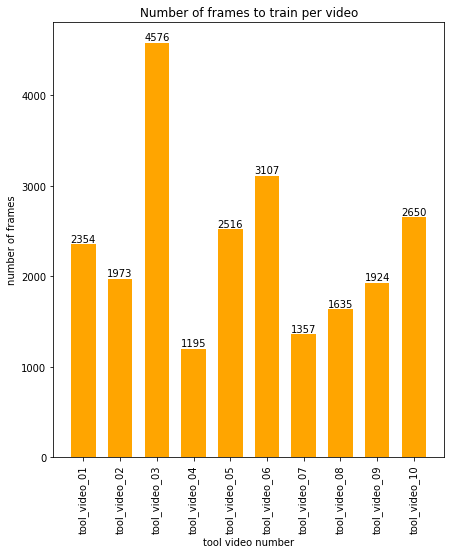

In [30]:
plotFramesPerVideo(number_of_frames_video_01, number_of_frames_video_02, number_of_frames_video_03, number_of_frames_video_04,
                   number_of_frames_video_05, number_of_frames_video_06, number_of_frames_video_07, number_of_frames_video_08,
                   number_of_frames_video_09, number_of_frames_video_10)

In [43]:
# Shape of the images 
# Run only first time
'''
shape_of_frame_video_01 = images[0].shape
shape_of_frame_video_02 = images[number_of_frames_video_01].shape
shape_of_frame_video_03 = images[number_of_frames_video_01+number_of_frames_video_02].shape
shape_of_frame_video_04 = images[number_of_frames_video_01+number_of_frames_video_02+number_of_frames_video_03].shape
shape_of_frame_video_05 = images[number_of_frames_video_01+number_of_frames_video_02+number_of_frames_video_03+\
                                number_of_frames_video_04].shape
shape_of_frame_video_06 = images[number_of_frames_video_01+number_of_frames_video_02+number_of_frames_video_03+\
                                number_of_frames_video_04+number_of_frames_video_05].shape
shape_of_frame_video_07 = images[number_of_frames_video_01+number_of_frames_video_02+number_of_frames_video_03+\
                                number_of_frames_video_04+number_of_frames_video_05+number_of_frames_video_06].shape
shape_of_frame_video_08 = images[number_of_frames_video_01+number_of_frames_video_02+number_of_frames_video_03+\
                                number_of_frames_video_04+number_of_frames_video_05+number_of_frames_video_06+\
                                number_of_frames_video_07].shape
shape_of_frame_video_09 = images[number_of_frames_video_01+number_of_frames_video_02+number_of_frames_video_03+\
                                number_of_frames_video_04+number_of_frames_video_05+number_of_frames_video_06+\
                                number_of_frames_video_07+number_of_frames_video_08].shape
shape_of_frame_video_10 = images[number_of_frames_video_01+number_of_frames_video_02+number_of_frames_video_03+\
                                number_of_frames_video_04+number_of_frames_video_05+number_of_frames_video_06+\
                                number_of_frames_video_07+number_of_frames_video_08+number_of_frames_video_09].shape
print('shape of the images in tool_video_01 is: '+str(shape_of_frame_video_01))
print('shape of the images in tool_video_02 is: '+str(shape_of_frame_video_02))
print('shape of the images in tool_video_03 is: '+str(shape_of_frame_video_03))
print('shape of the images in tool_video_04 is: '+str(shape_of_frame_video_04))
print('shape of the images in tool_video_05 is: '+str(shape_of_frame_video_05))
print('shape of the images in tool_video_06 is: '+str(shape_of_frame_video_06))
print('shape of the images in tool_video_07 is: '+str(shape_of_frame_video_07))
print('shape of the images in tool_video_08 is: '+str(shape_of_frame_video_08))
print('shape of the images in tool_video_09 is: '+str(shape_of_frame_video_09))
print('shape of the images in tool_video_10 is: '+str(shape_of_frame_video_10))
'''

shape of the images in tool_video_01 is: (334, 596, 3)
shape of the images in tool_video_02 is: (434, 774, 3)
shape of the images in tool_video_03 is: (402, 716, 3)
shape of the images in tool_video_04 is: (344, 612, 3)
shape of the images in tool_video_05 is: (476, 846, 3)
shape of the images in tool_video_06 is: (328, 584, 3)
shape of the images in tool_video_07 is: (328, 586, 3)
shape of the images in tool_video_08 is: (396, 706, 3)
shape of the images in tool_video_09 is: (454, 810, 3)
shape of the images in tool_video_10 is: (324, 578, 3)


### Resize the training data set

In [39]:
width = 224
height = 224
#data_set_X = resizeImages(images,width,height); # uncomment when you require to change the shape of images

In [42]:
#print('shape of training data set: '+str(data_set_X.shape))

shape of training data set: (23287, 224, 224, 3)


### Display the few images

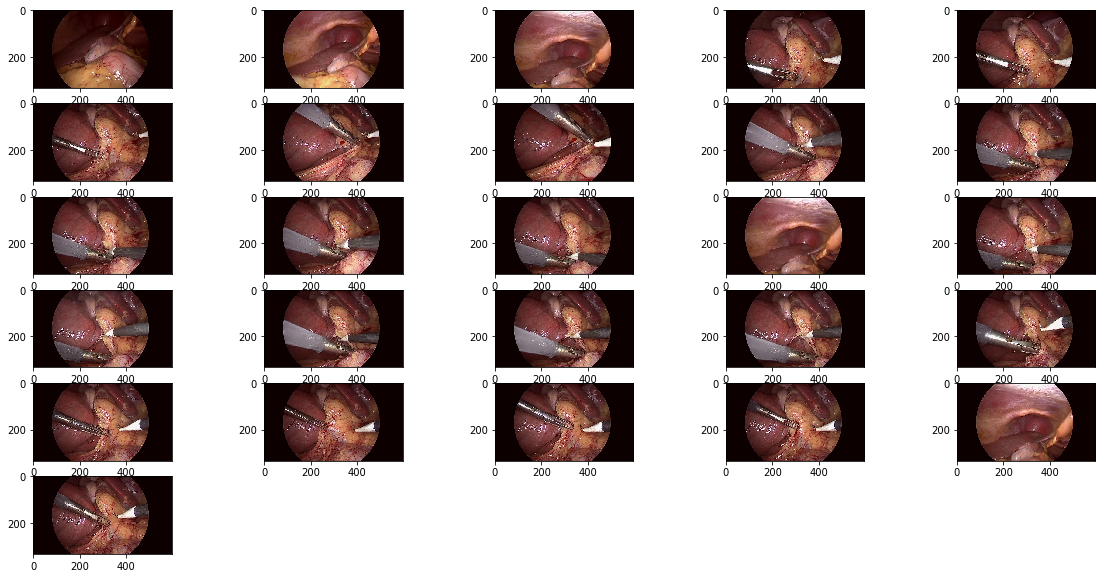

In [65]:
#rows = 5
#columns=5
#plt.figure(figsize=(20,10))
#max_images = rows * columns;
#step = int(len(images)/max_images)
#image_list = np.arange(0,len(images),step)
#i=0
#for idx in range(len(image_list)):
 #   plt.subplot(max_images / columns + 1, columns, i+1)
  #  plt.imshow(images[idx])
   # i+=1

### Combine all data frames

In [32]:
data_set_y = getCombinedDataFrames(tool_video_01_df, tool_video_02_df, tool_video_03_df, tool_video_04_df, tool_video_05_df,\
                                 tool_video_06_df, tool_video_07_df, tool_video_08_df, tool_video_09_df, tool_video_10_df)

In [33]:
print('Shape of label of training data: '+str(data_set_y.shape))

Shape of label of training data: (23287, 7)


### Save the training data set in .h5 file

In [91]:
h5filename = 'train_surgery_tool.h5'
#saveData(filepath, h5filename, data_set_X, data_set_y, data_type = 'training'); # Run only first time

### Visualize the presence of tools in video

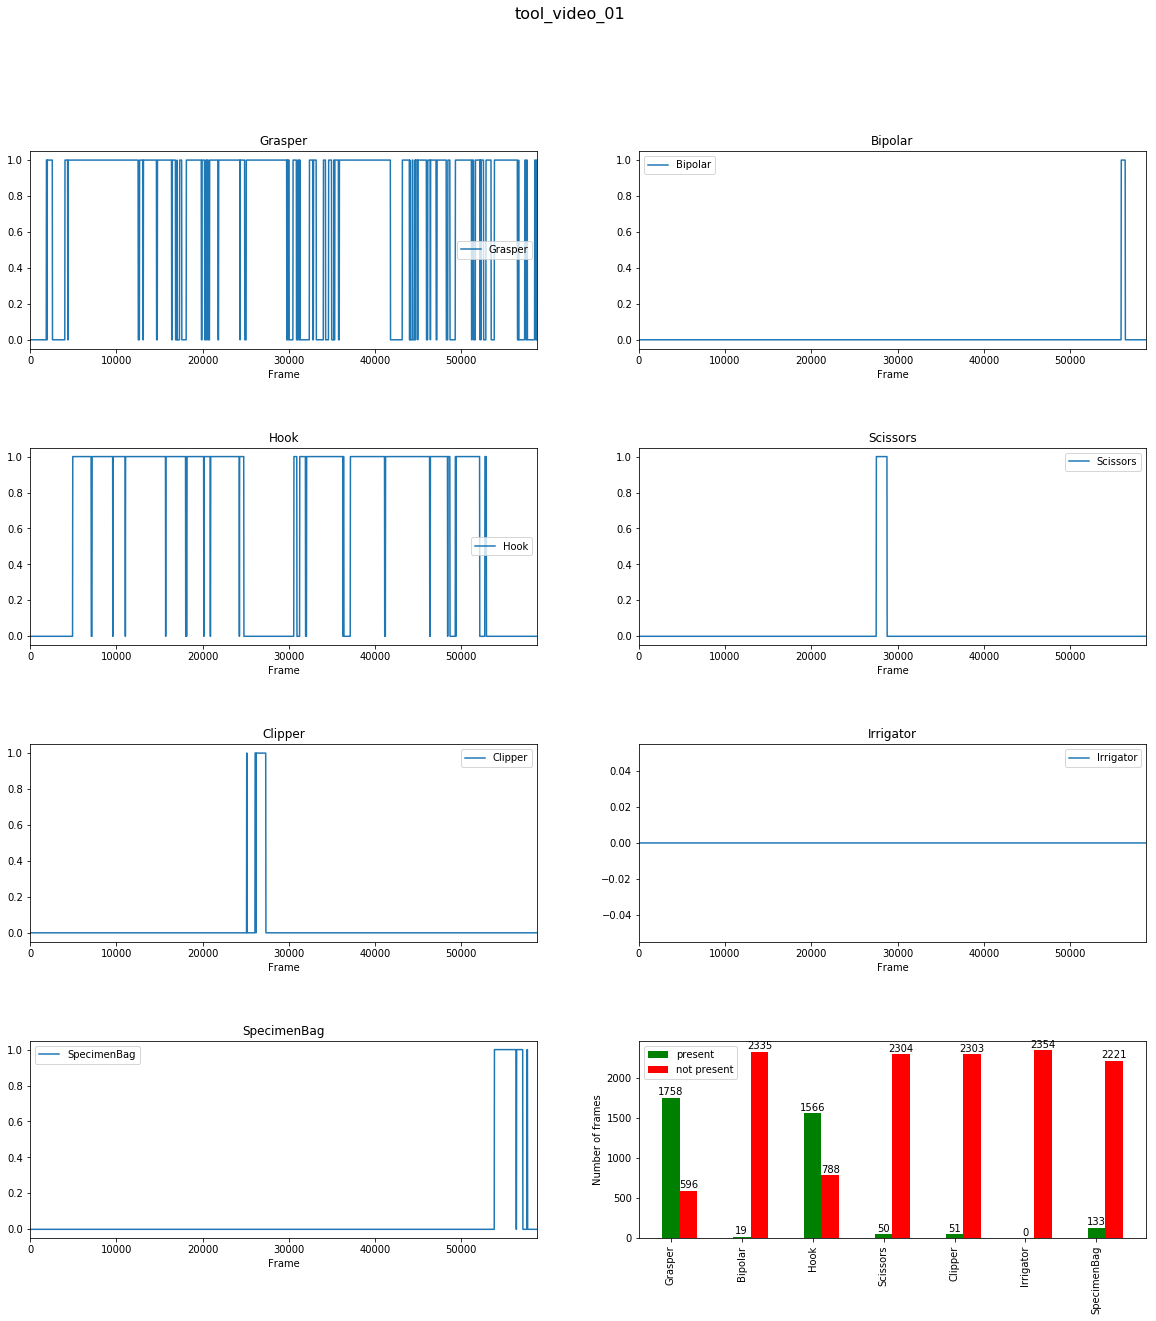

In [47]:
tool_video_01_present, tool_video_01_not_present =\
        plotToolsPresence(tool_video_01_df, number_of_frames_video_01, title='tool_video_01')

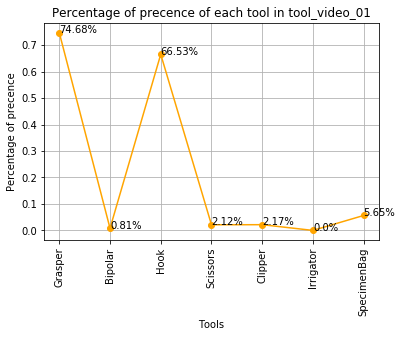

In [58]:
percentage_presence_tool_video_01 =\
        plotPercentageOfToolPresence(tool_video_01_present, number_of_frames_video_01, title = 'tool_video_01')

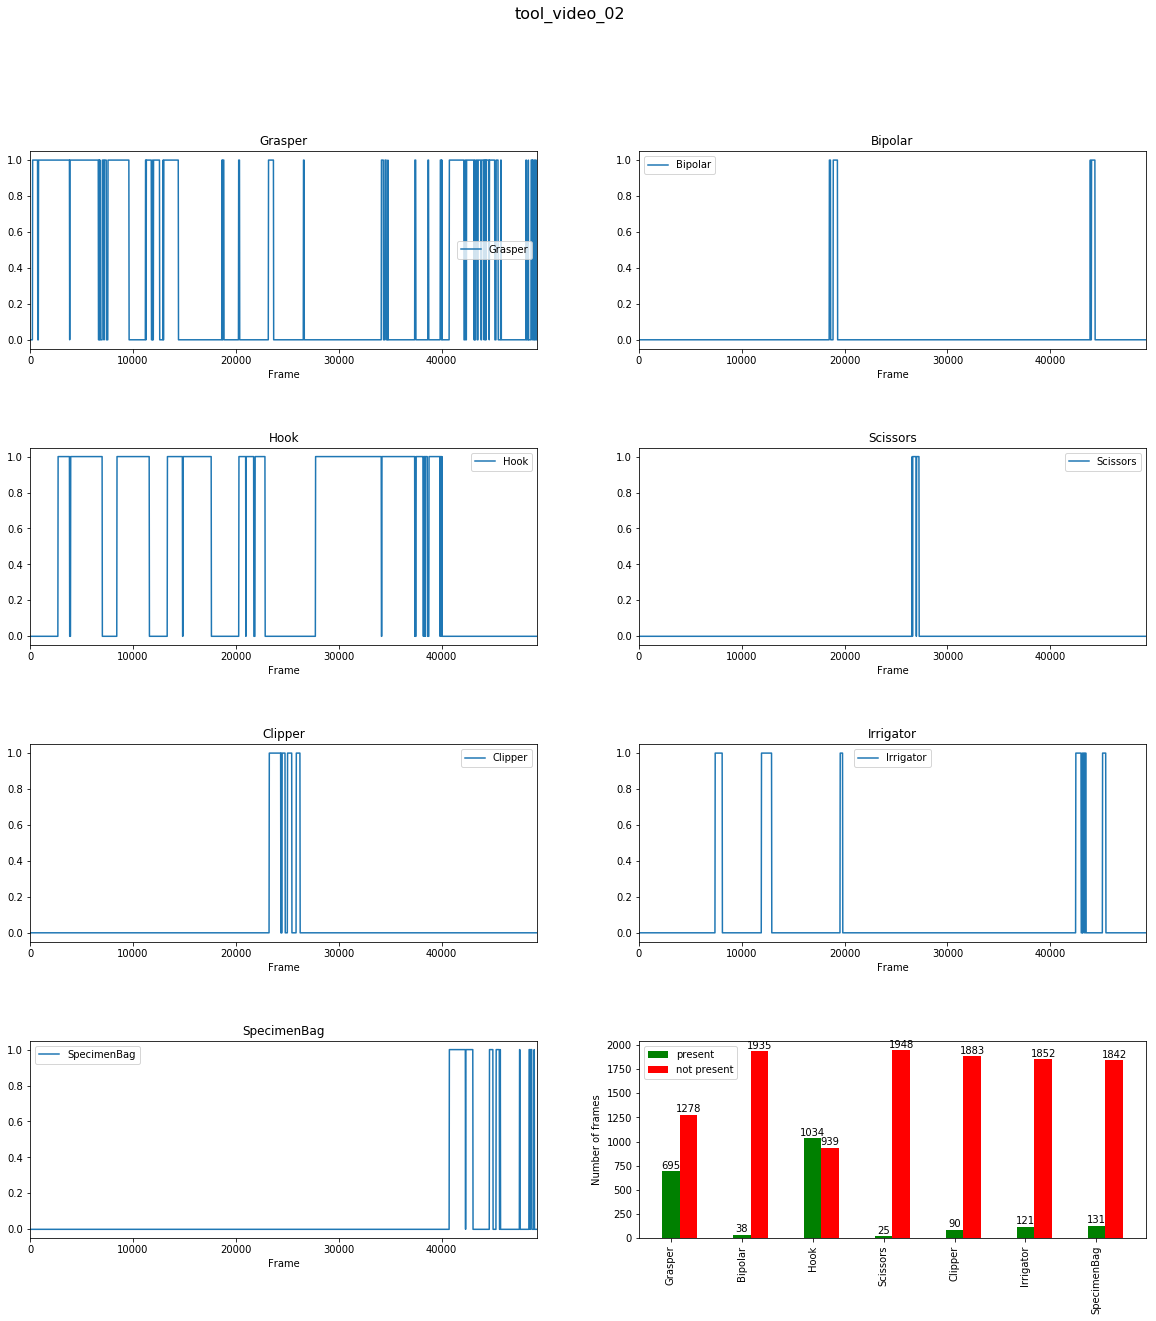

In [48]:
tool_video_02_present, tool_video_02_not_present =\
        plotToolsPresence(tool_video_02_df, number_of_frames_video_02, title='tool_video_02')

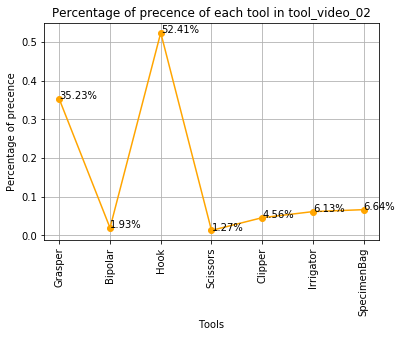

In [59]:
percentage_presence_tool_video_02 =\
        plotPercentageOfToolPresence(tool_video_02_present, number_of_frames_video_02, title = 'tool_video_02')

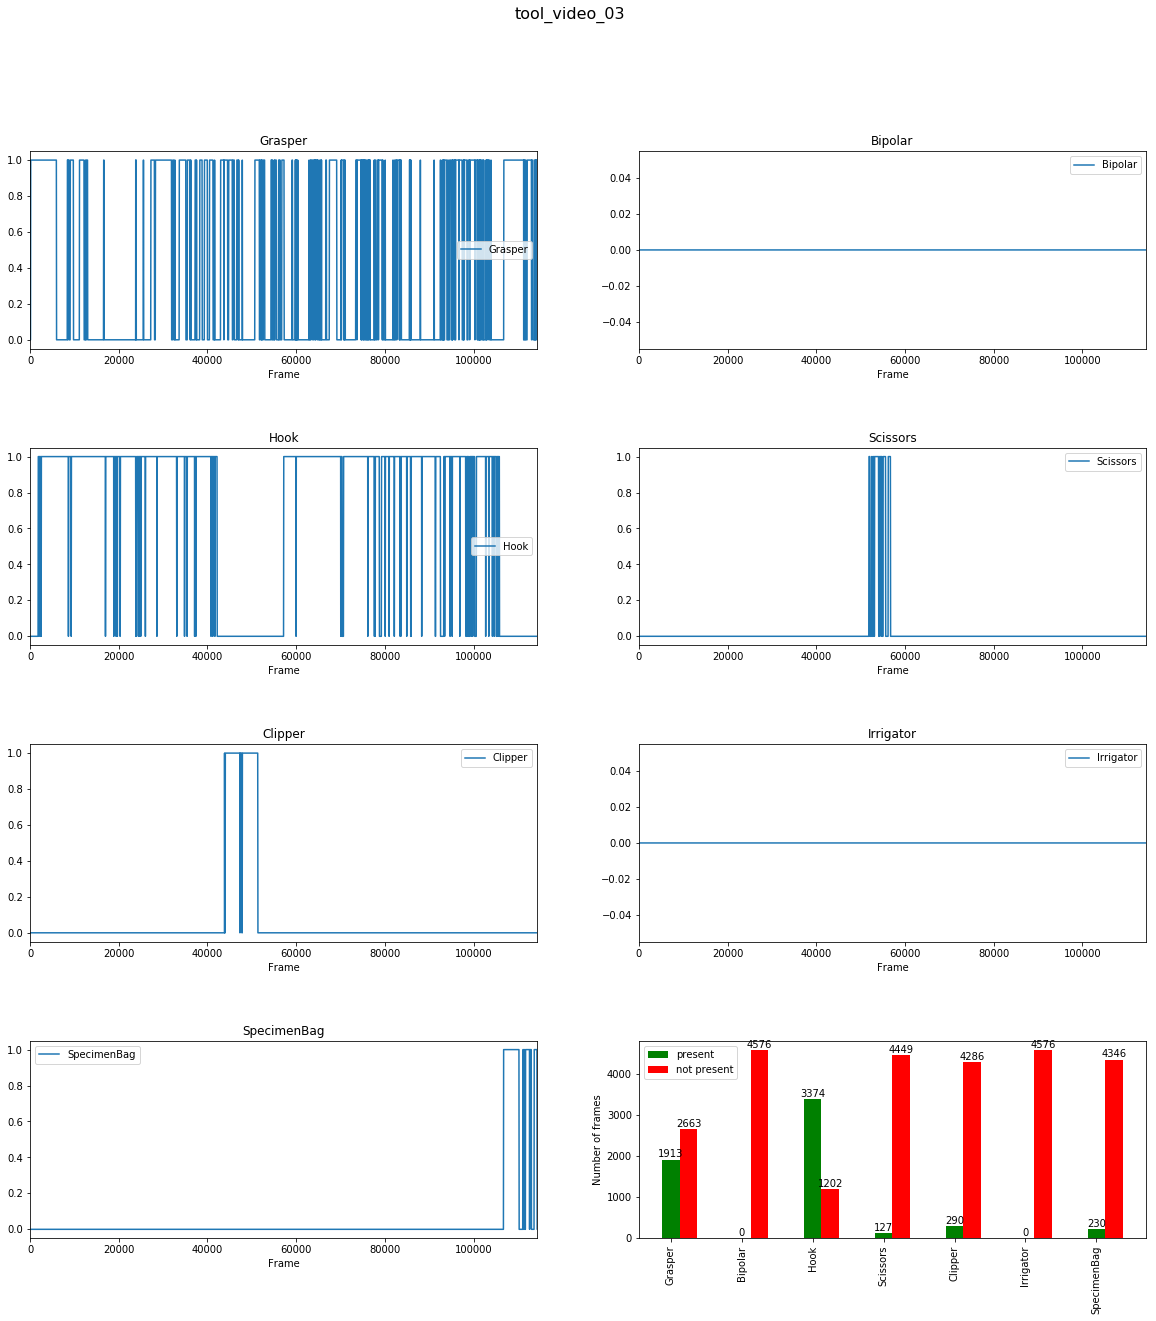

In [49]:
tool_video_03_present, tool_video_03_not_present =\
       plotToolsPresence(tool_video_03_df, number_of_frames_video_03, title='tool_video_03')

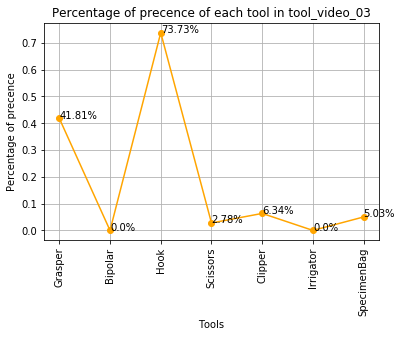

In [60]:
percentage_presence_tool_video_03 =\
        plotPercentageOfToolPresence(tool_video_03_present, number_of_frames_video_03, title = 'tool_video_03')

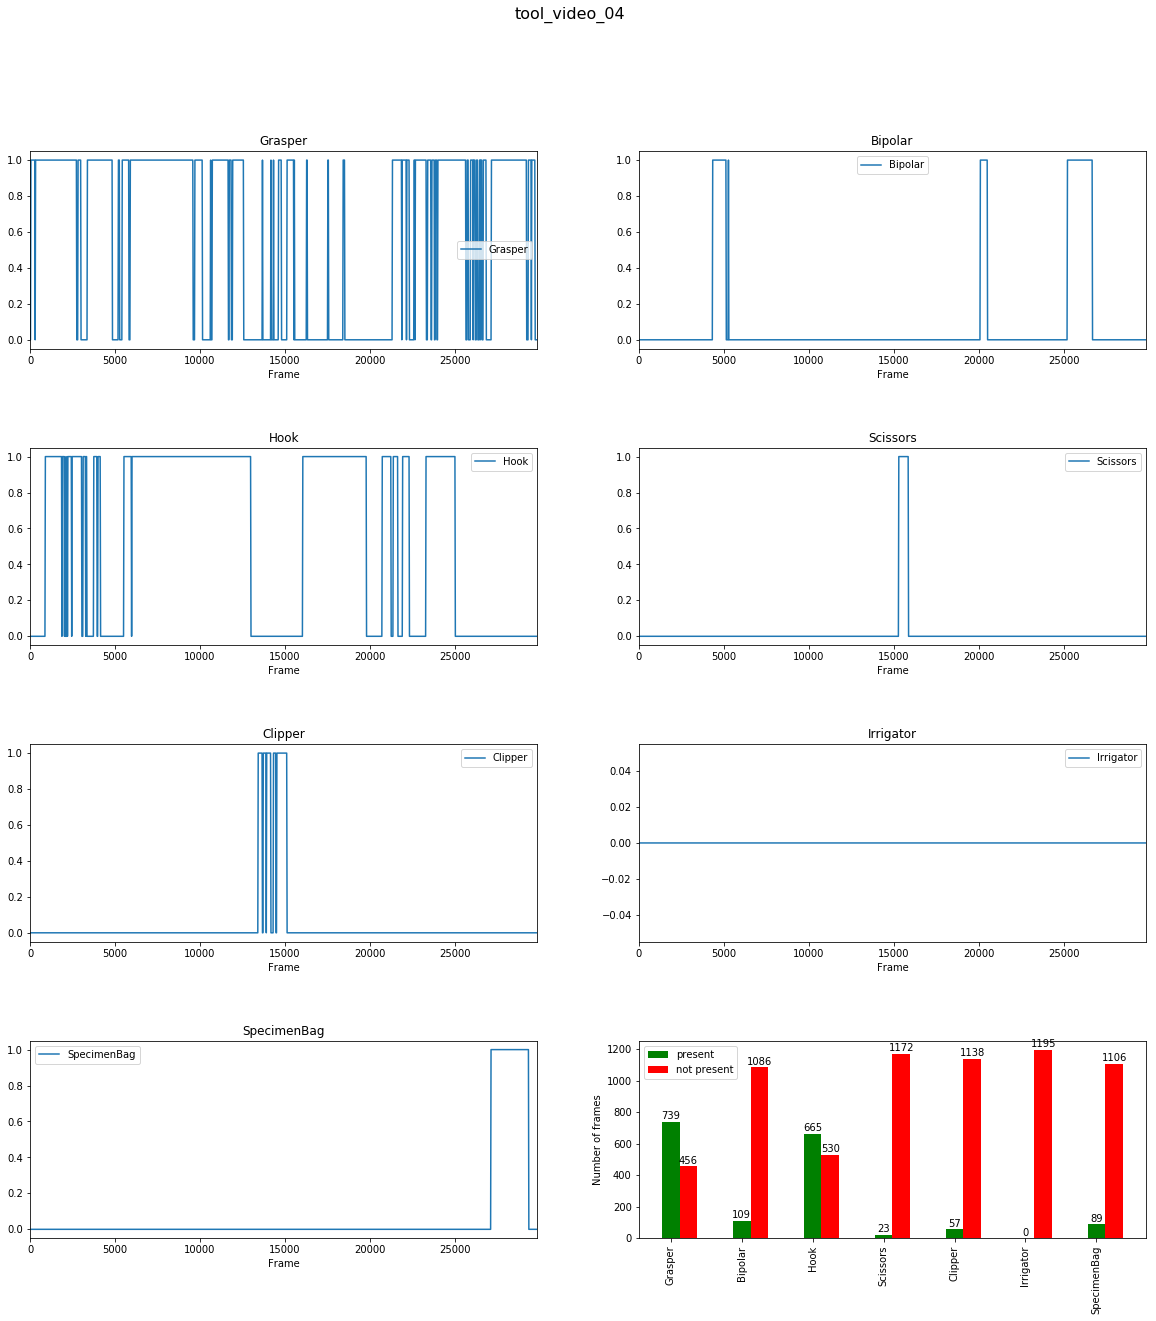

In [50]:
tool_video_04_present, tool_video_04_not_present =\
        plotToolsPresence(tool_video_04_df, number_of_frames_video_04, title='tool_video_04')

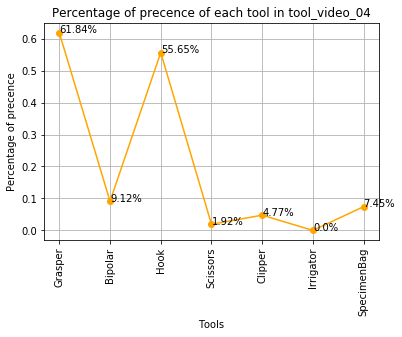

In [61]:
percentage_presence_tool_video_04 =\
        plotPercentageOfToolPresence(tool_video_04_present, number_of_frames_video_04, title = 'tool_video_04')

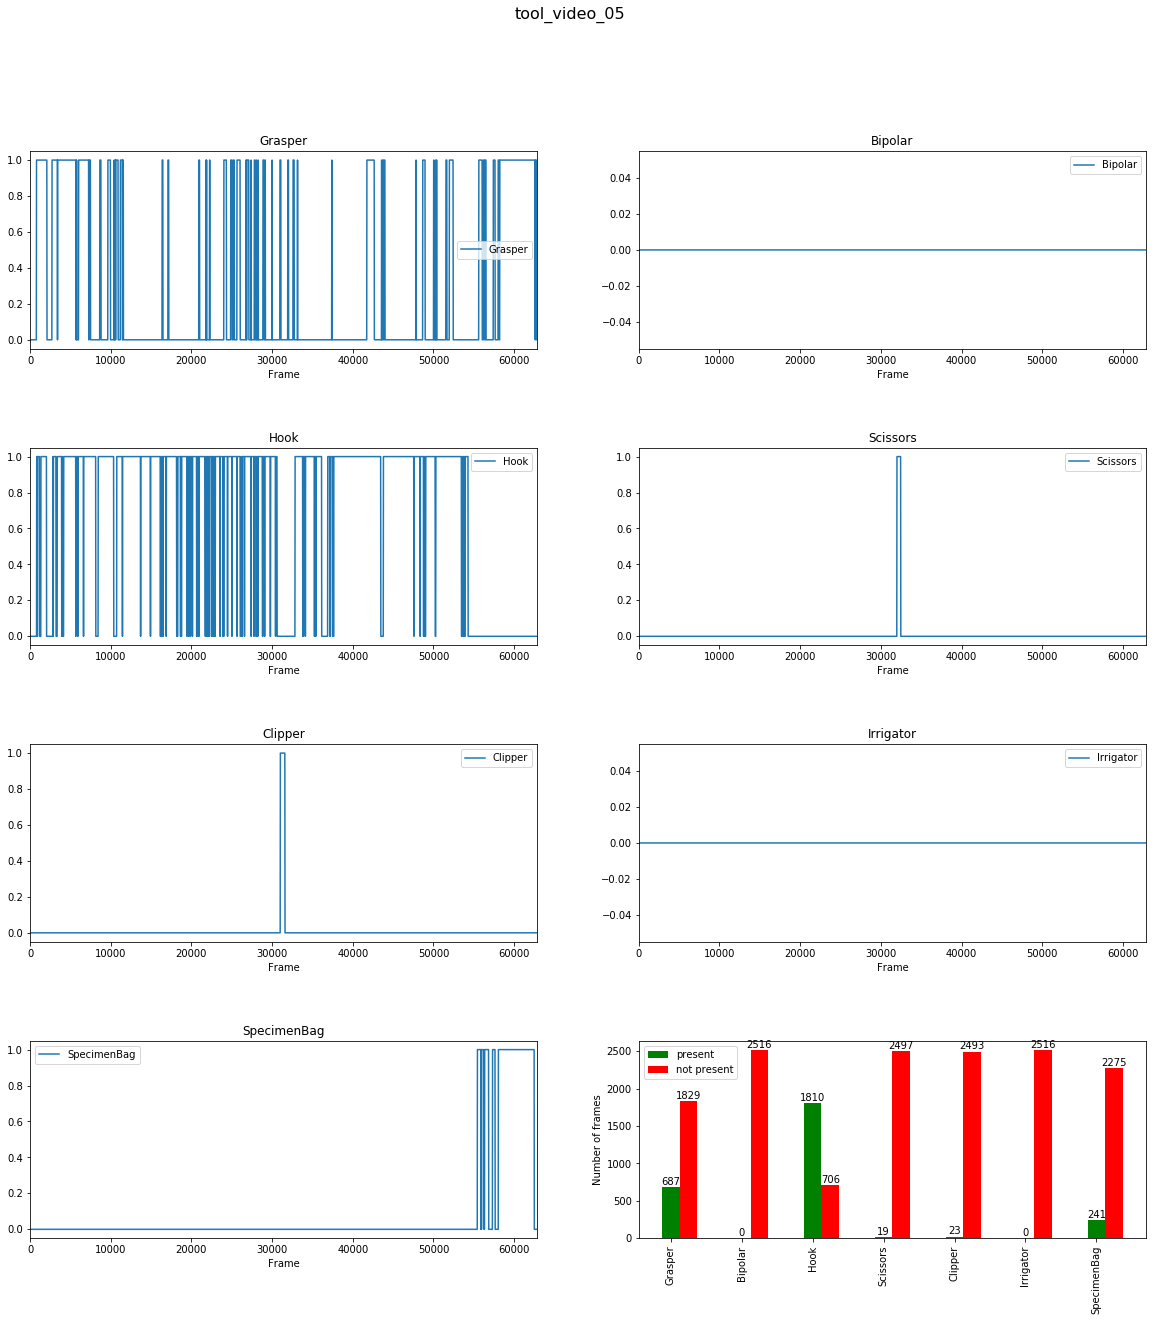

In [51]:
tool_video_05_present, tool_video_05_not_present =\
        plotToolsPresence(tool_video_05_df, number_of_frames_video_05, title='tool_video_05')

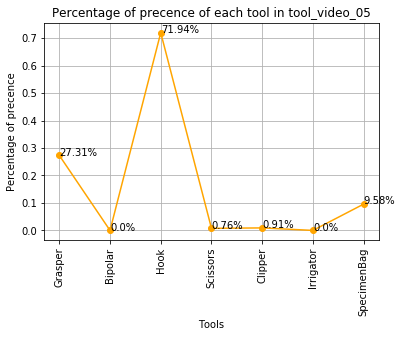

In [62]:
percentage_presence_tool_video_05 =\
        plotPercentageOfToolPresence(tool_video_05_present, number_of_frames_video_05, title = 'tool_video_05')

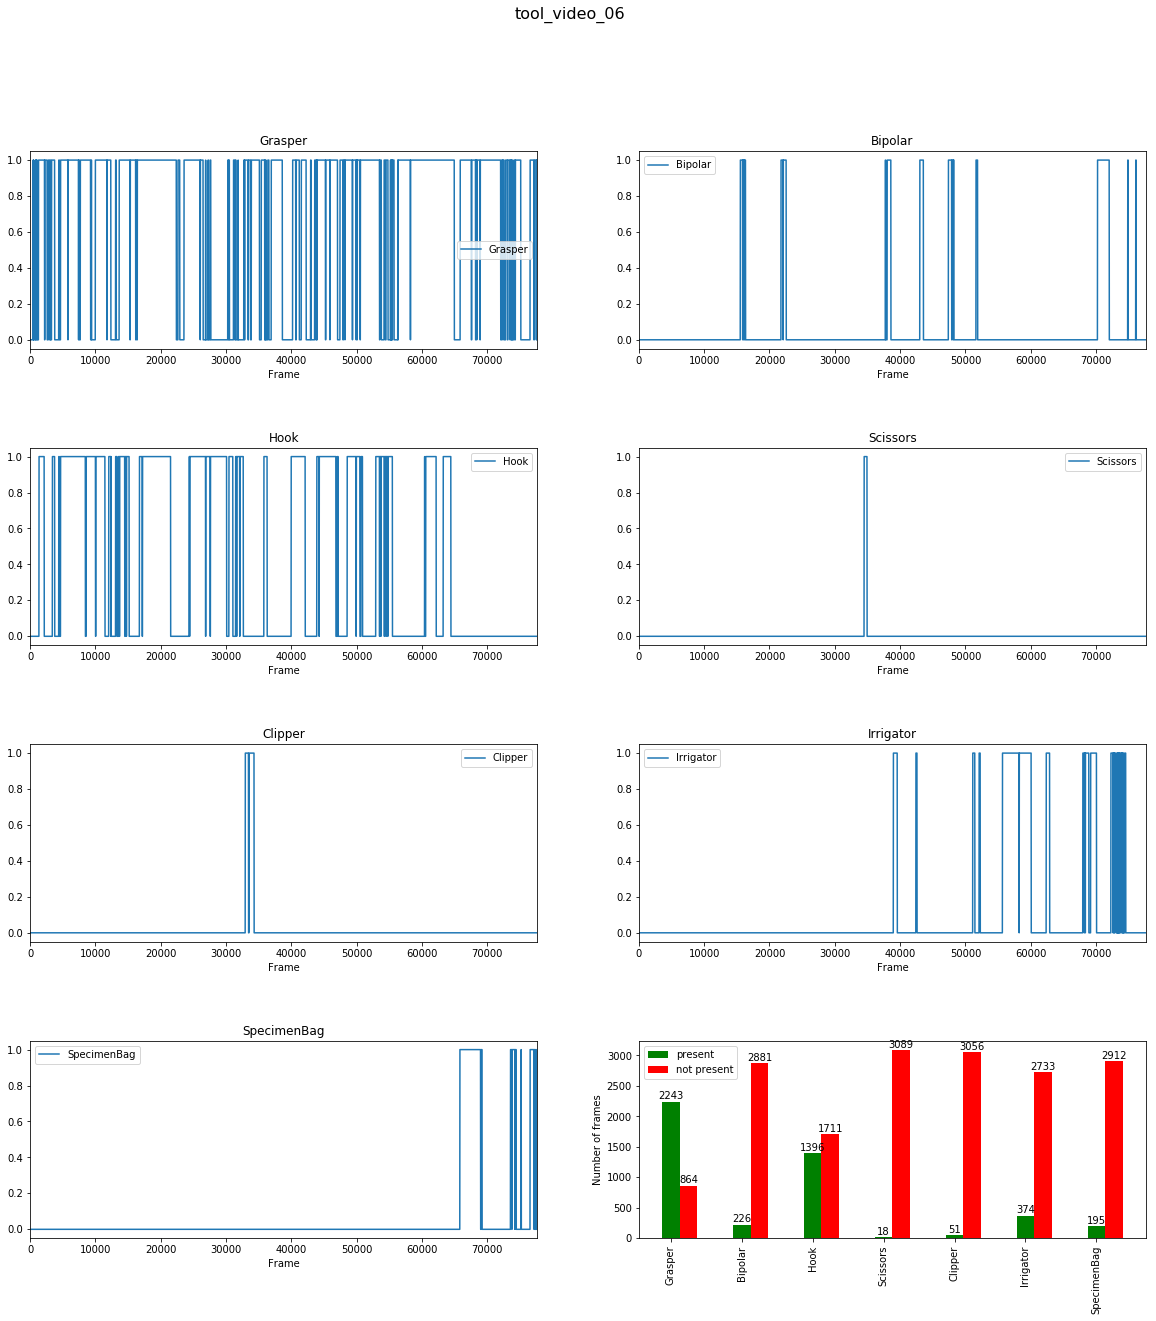

In [52]:
tool_video_06_present, tool_video_06_not_present =\
        plotToolsPresence(tool_video_06_df, number_of_frames_video_06, title='tool_video_06')

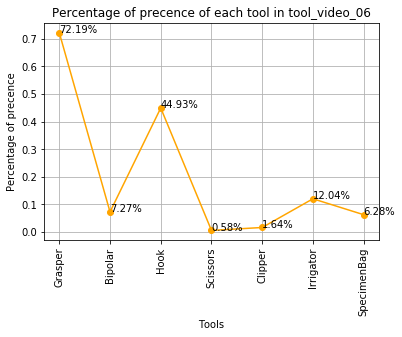

In [63]:
percentage_presence_tool_video_06 =\
        plotPercentageOfToolPresence(tool_video_06_present, number_of_frames_video_06, title = 'tool_video_06')

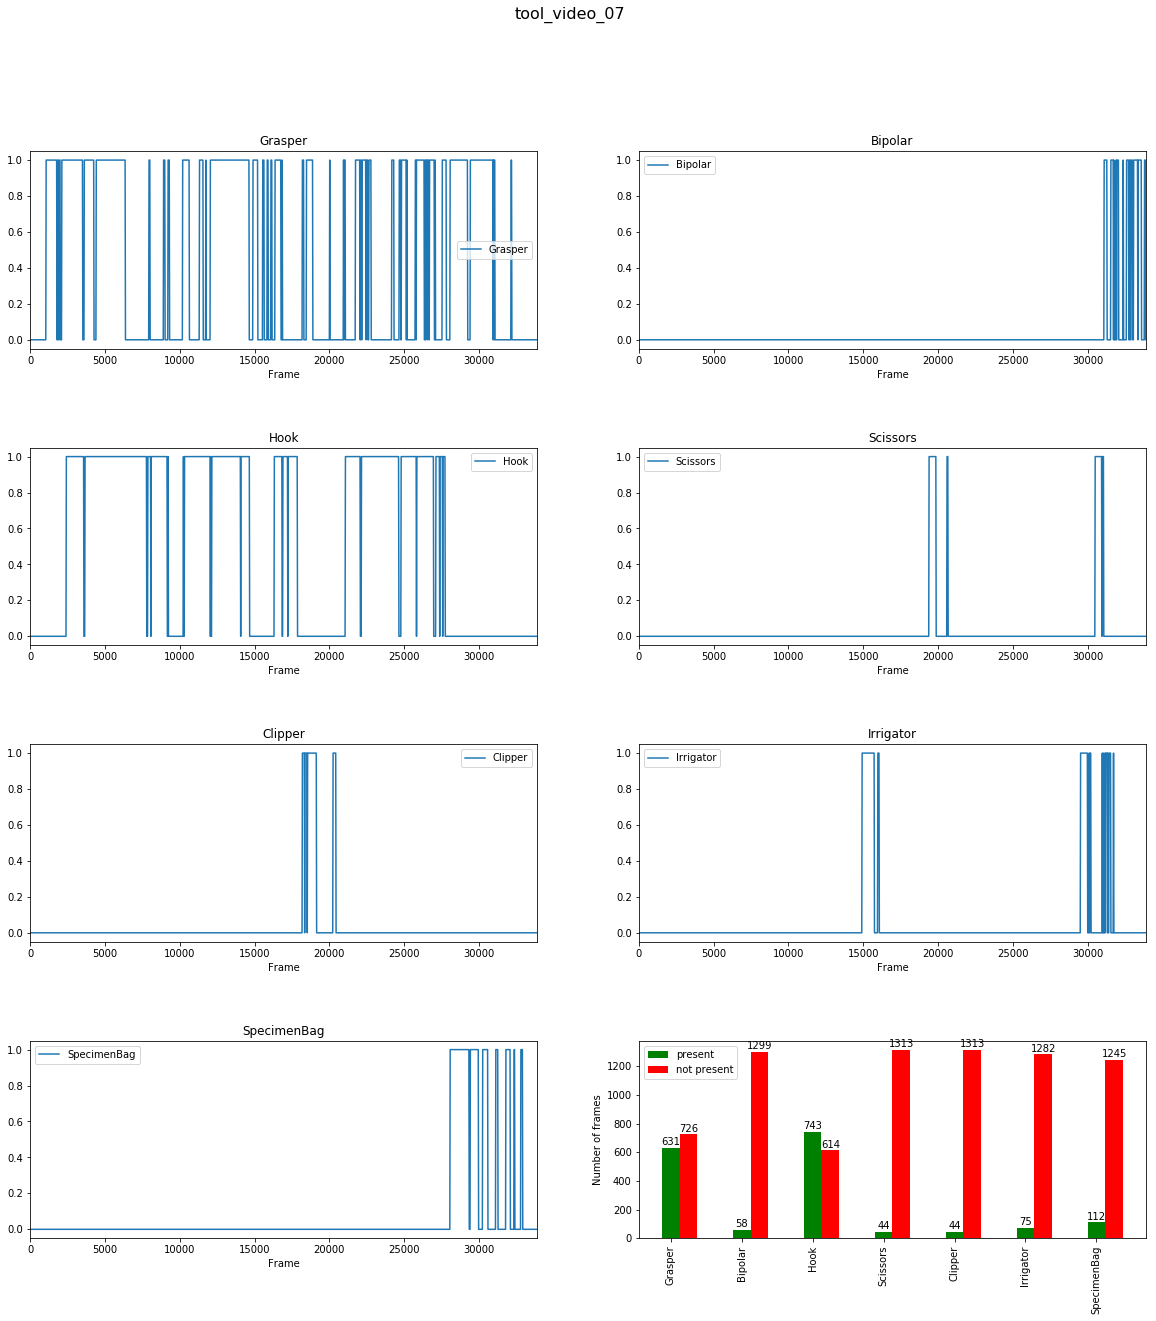

In [53]:
tool_video_07_present, tool_video_07_not_present =\
        plotToolsPresence(tool_video_07_df, number_of_frames_video_07, title='tool_video_07')

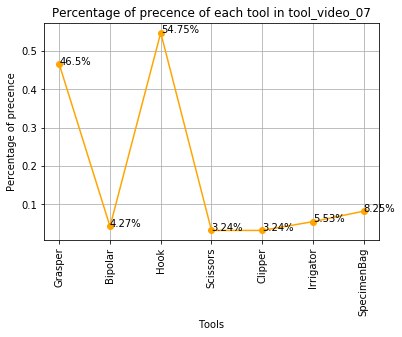

In [64]:
percentage_presence_tool_video_07 =\
        plotPercentageOfToolPresence(tool_video_07_present, number_of_frames_video_07, title = 'tool_video_07')

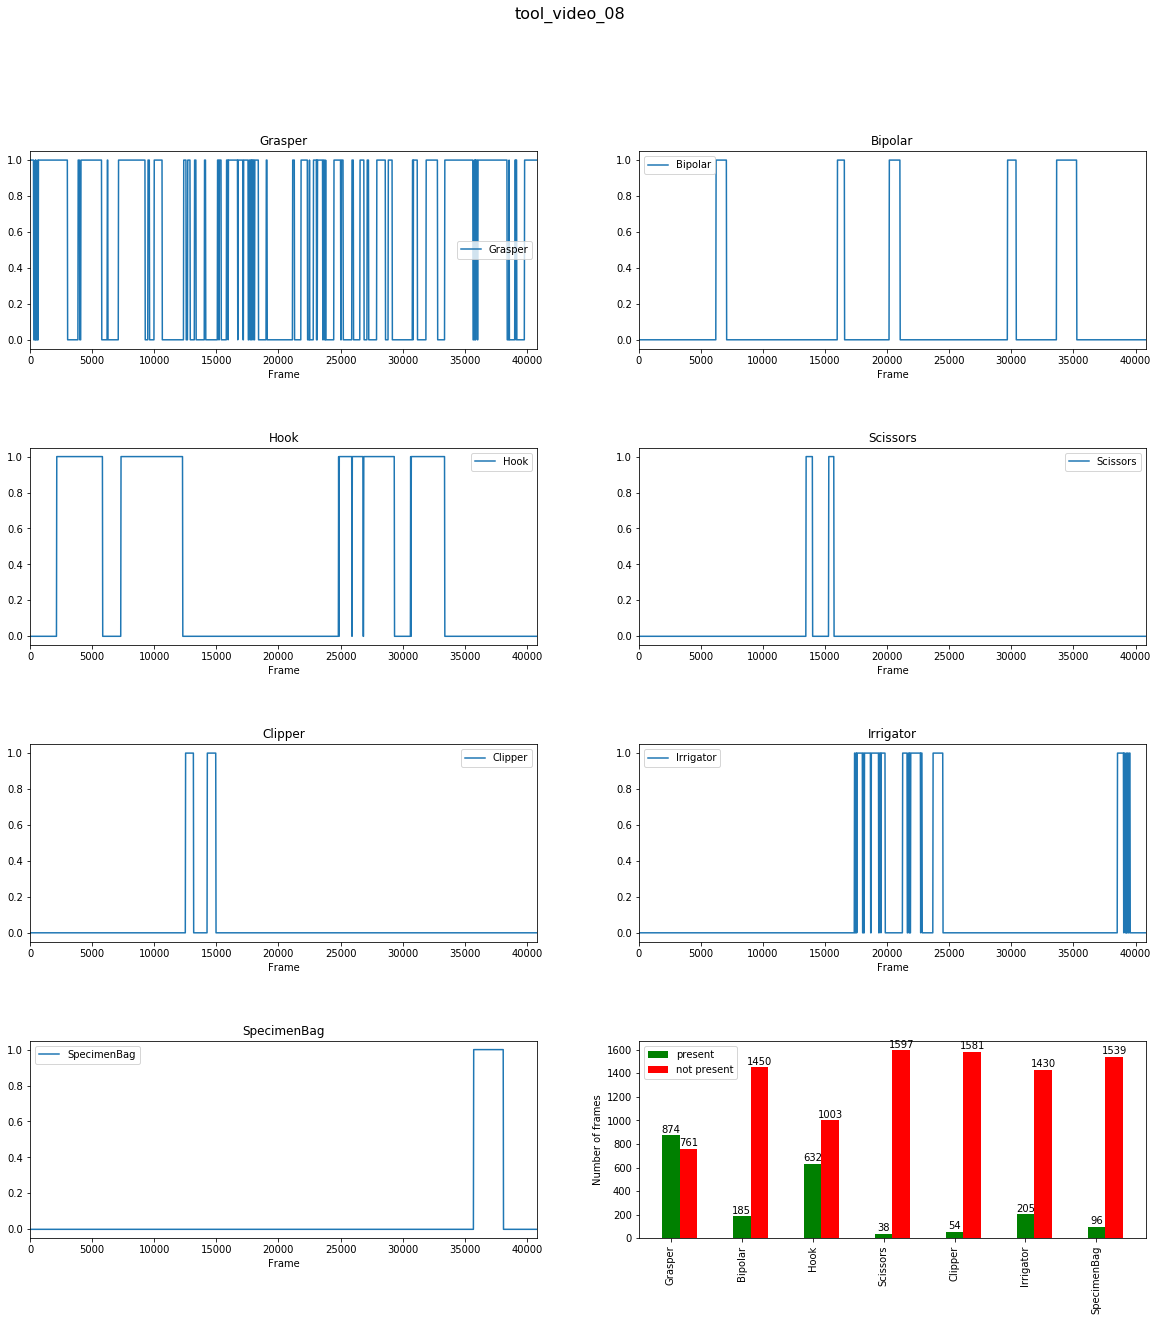

In [54]:
tool_video_08_present, tool_video_08_not_present =\
         plotToolsPresence(tool_video_08_df, number_of_frames_video_08, title='tool_video_08')

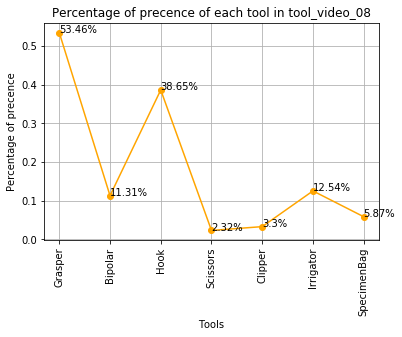

In [65]:
percentage_presence_tool_video_08 =\
        plotPercentageOfToolPresence(tool_video_08_present, number_of_frames_video_08, title = 'tool_video_08')

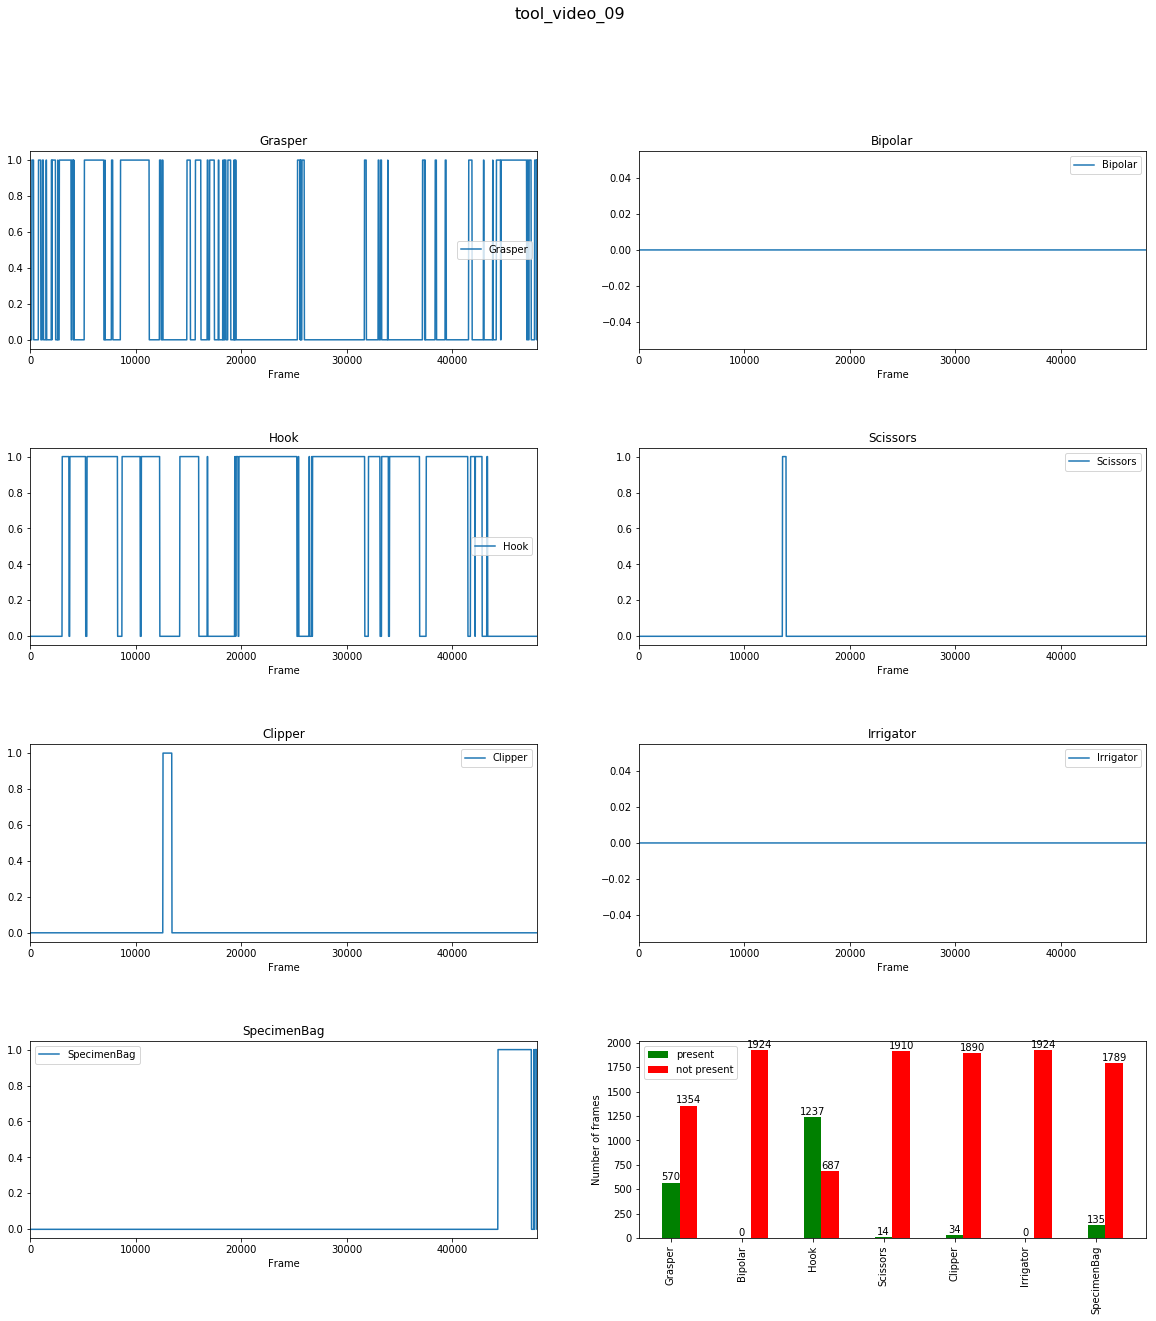

In [55]:
tool_video_09_present, tool_video_09_not_present =\
         plotToolsPresence(tool_video_09_df, number_of_frames_video_09, title='tool_video_09')

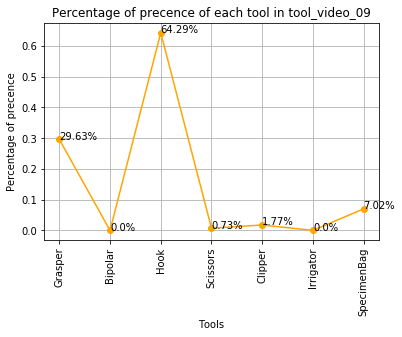

In [66]:
percentage_presence_tool_video_09 =\
        plotPercentageOfToolPresence(tool_video_09_present, number_of_frames_video_09, title = 'tool_video_09')

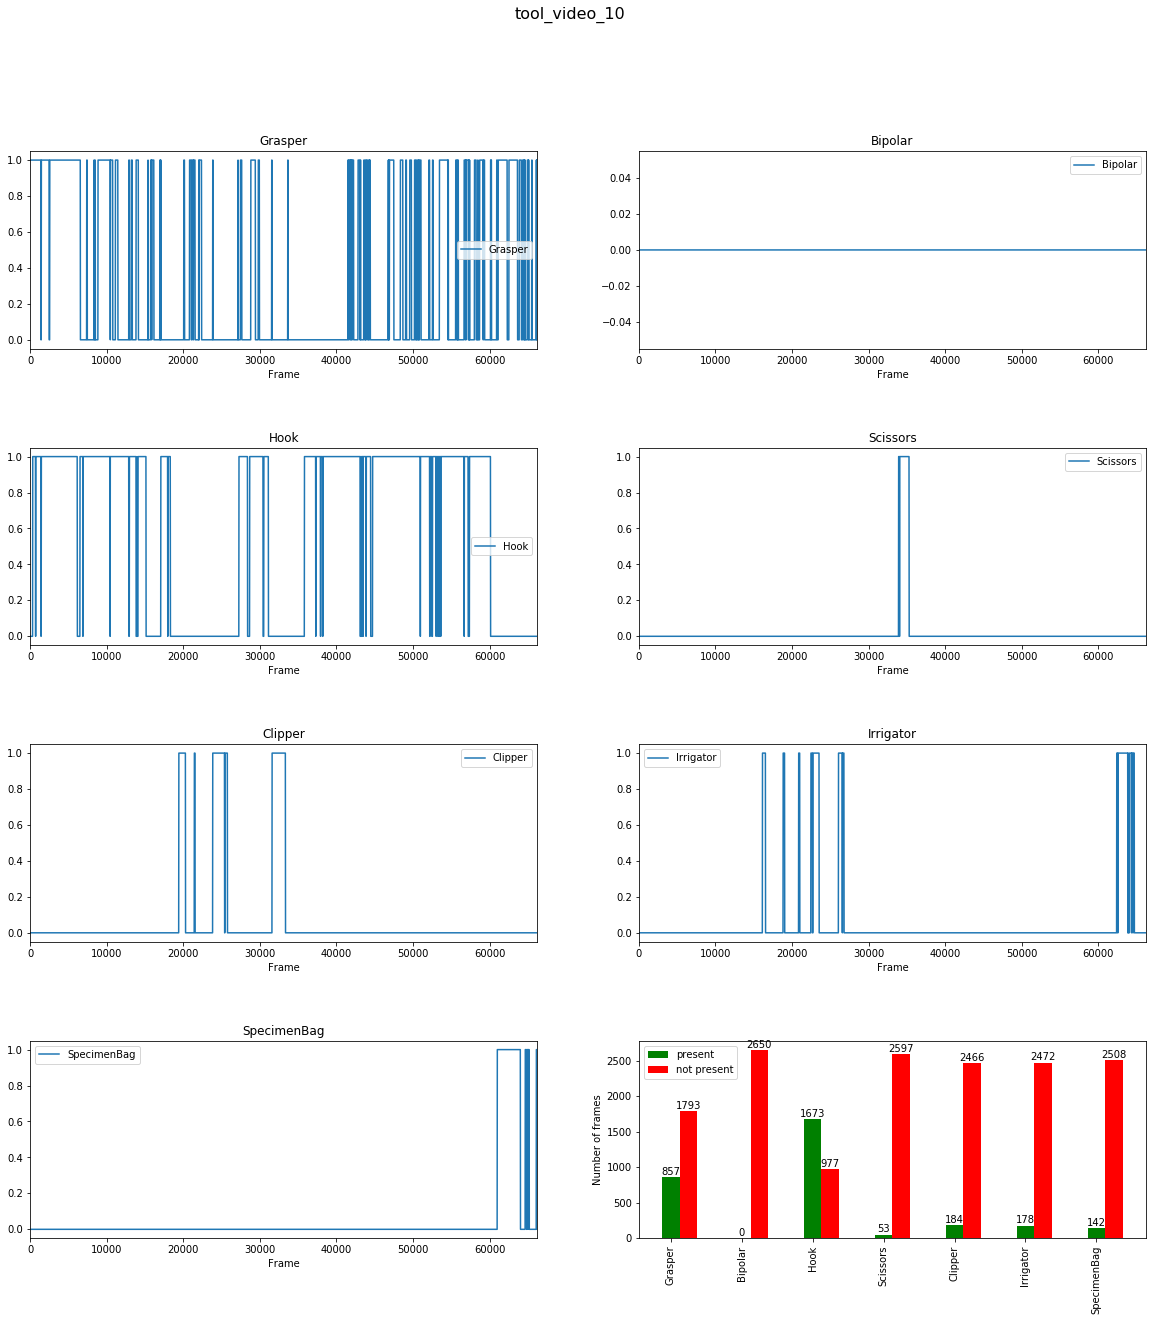

In [56]:
tool_video_10_present, tool_video_10_not_present =\
        plotToolsPresence(tool_video_10_df, number_of_frames_video_10, title='tool_video_10')

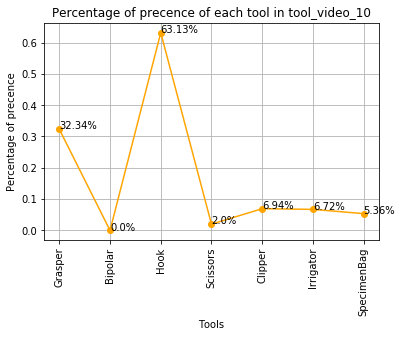

In [67]:
percentage_presence_tool_video_10 =\
        plotPercentageOfToolPresence(tool_video_10_present, number_of_frames_video_10, title = 'tool_video_10')

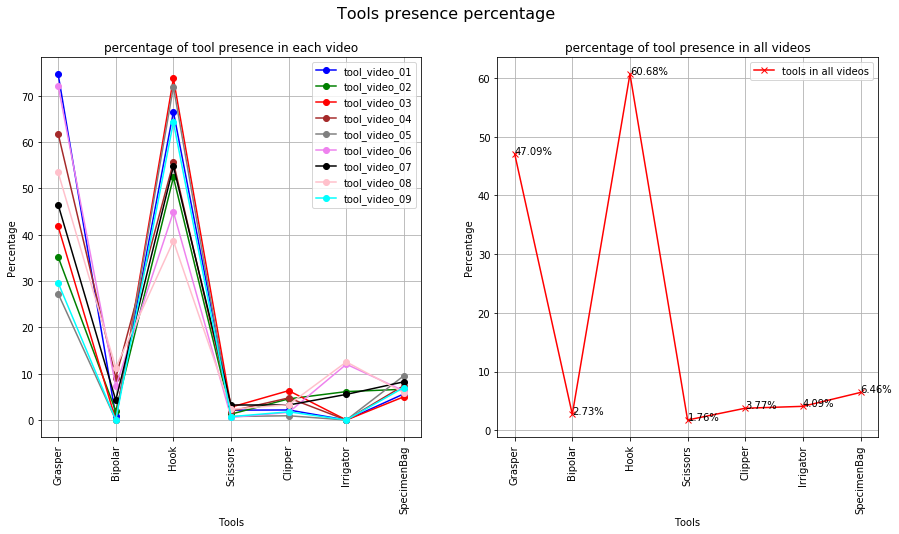

In [74]:
percentage_presence_tool_video_list = [percentage_presence_tool_video_01, percentage_presence_tool_video_02,\
                                       percentage_presence_tool_video_03, percentage_presence_tool_video_04,\
                                       percentage_presence_tool_video_05, percentage_presence_tool_video_06,\
                                       percentage_presence_tool_video_07, percentage_presence_tool_video_08,\
                                       percentage_presence_tool_video_09, percentage_presence_tool_video_10]
colors = ['blue', 'green', 'red', 'brown', 'gray', 'violet', 'black', 'pink', 'cyan']
legend_list = ['tool_video_01', 'tool_video_02', 'tool_video_03', 'tool_video_04', 'tool_video_05', 'tool_video_06',\
               'tool_video_07', 'tool_video_08', 'tool_video_09', 'tool_video_10']
tool_video_present_list = [tool_video_01_present, tool_video_02_present, tool_video_03_present, tool_video_04_present,\
                           tool_video_05_present, tool_video_06_present, tool_video_07_present, tool_video_08_present,\
                           tool_video_09_present, tool_video_10_present]
total_number_of_frames = number_of_frames_video_01 + number_of_frames_video_02 + number_of_frames_video_03+\
        number_of_frames_video_04 + number_of_frames_video_05 + number_of_frames_video_06 + number_of_frames_video_07+\
        number_of_frames_video_08 + number_of_frames_video_09 + number_of_frames_video_10


#percentage_presence_of_tool_in_all_videos=\
        #plotCombinedPercentageOfToolPresence(percentage_presence_tool_video_list, colors, legend_list, tool_video_present_list,\
                                             #total_number_of_frames)
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,7))
fig.suptitle('Tools presence percentage', fontsize=16)
tool_names = ['Grasper', 'Bipolar', 'Hook', 'Scissors', 'Clipper', 'Irrigator', 'SpecimenBag']
x_axis = np.arange(len(tool_names))
plt.subplot(121)
for pptv, clr in zip(percentage_presence_tool_video_list, colors):
    #print(clr)
    #print(pptv)
    plt.plot(x_axis, pptv*100, marker='o', color =clr)
plt.legend(legend_list)
plt.xlabel('Tools')
plt.ylabel('Percentage')
plt.title('percentage of tool presence in each video')
plt.xticks(x_axis,tool_names, rotation='vertical')
plt.grid()
## for all videos
tool_present_in_all_videos = [sum(x) for x in zip(*tool_video_present_list)]
percentage_presence_of_tool_in_all_videos = np.divide(tool_present_in_all_videos,total_number_of_frames) * 100
plt.subplot(122)
plt.plot(x_axis, percentage_presence_of_tool_in_all_videos, marker='x', color ='red')
plt.legend(['tools in all videos'])
plt.xlabel('Tools')
plt.ylabel('Percentage')
plt.title('percentage of tool presence in all videos')
plt.xticks(x_axis,tool_names, rotation='vertical')
for i,j in zip(x_axis,percentage_presence_of_tool_in_all_videos):
    plt.annotate(str(round(j,2))+'%',xy=(i,j))
plt.grid()

## Test Data

### Read video files and write frames into a directory

In [54]:
filepath = 'data/m2cai16-tool/test_dataset/'
filenames = ['tool_vedio_11', 'tool_vedio_12', 'tool_vedio_13', 'tool_vedio_14', 'tool_vedio_15']
paths = ['data/m2cai16-tool/test_dataset/tool_video_11.mp4', 'data/m2cai16-tool/test_dataset/tool_video_12.mp4',\
         'data/m2cai16-tool/test_dataset/tool_video_13.mp4', 'data/m2cai16-tool/test_dataset/tool_video_14.mp4',\
         'data/m2cai16-tool/test_dataset/tool_video_15.mp4']

#for filename,path in zip(filenames,paths):
    #video2frame(filepath, filename, path, 25) ; # Need first time when you write frames from video in your local path

### Display Video

In [55]:
video_number = 0
#displayVideo(paths[video_number],25); # Uncomment when you need to display the particular video

### Load the images (or frames)

In [80]:
# images : list of all require testing frames
# images = loadImages(filepath); # uncomment when you required. It will take somet time. 

In [81]:
# print("Number of images: "+str(len(images)))

Number of images: 12541


### Read Text labels files

In [57]:
# Read tool_video_11.txt
filename = 'tool_video_11'
tool_video_11_df = readTextFile(filepath, filename)
tool_video_11_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        0        0     0         0        0          0            0
1     25        0        0     0         0        0          0            0
2     50        0        0     0         0        0          0            0
3     75        0        0     0         0        0          0            0
4    100        0        0     0         0        0          0            0

In [58]:
tool_video_11_df.describe()

Frame      Grasper      Bipolar         Hook     Scissors  \
count    4410.000000  4410.000000  4410.000000  4410.000000  4410.000000   
mean    55112.500000     0.587755     0.011565     0.554875     0.009977   
std     31830.041824     0.492295     0.106927     0.497036     0.099398   
min         0.000000     0.000000     0.000000     0.000000     0.000000   
25%     27556.250000     0.000000     0.000000     0.000000     0.000000   
50%     55112.500000     1.000000     0.000000     1.000000     0.000000   
75%     82668.750000     1.000000     0.000000     1.000000     0.000000   
max    110225.000000     1.000000     1.000000     1.000000     1.000000   

           Clipper  Irrigator  SpecimenBag  
count  4410.000000     4410.0  4410.000000  
mean      0.023356        0.0     0.031973  
std       0.151049        0.0     0.175948  
min       0.000000        0.0     0.000000  
25%       0.000000        0.0     0.000000  
50%       0.000000        0.0     0.000000  
75%       0.000000        0.0     0.000000  
max       1.000000        0.0     1.000000

In [59]:
# Read tool_video_12.txt
filename = 'tool_video_12'
tool_video_12_df = readTextFile(filepath, filename)
tool_video_12_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        0        0     0         0        0          0            0
1     25        0        0     0         0        0          0            0
2     50        1        0     0         0        0          0            0
3     75        1        0     0         0        0          0            0
4    100        1        0     0         0        0          0            0

In [60]:
tool_video_12_df.describe()

Frame      Grasper     Bipolar         Hook     Scissors  \
count   2033.000000  2033.000000  2033.00000  2033.000000  2033.000000   
mean   25400.000000     0.535662     0.01574     0.749631     0.009838   
std    14675.521711     0.498849     0.12450     0.433332     0.098720   
min        0.000000     0.000000     0.00000     0.000000     0.000000   
25%    12700.000000     0.000000     0.00000     0.000000     0.000000   
50%    25400.000000     1.000000     0.00000     1.000000     0.000000   
75%    38100.000000     1.000000     0.00000     1.000000     0.000000   
max    50800.000000     1.000000     1.00000     1.000000     1.000000   

           Clipper    Irrigator  SpecimenBag  
count  2033.000000  2033.000000  2033.000000  
mean      0.012789     0.013281     0.034924  
std       0.112391     0.114503     0.183632  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000

In [61]:
# Read tool_video_13.txt
filename = 'tool_video_13'
tool_video_13_df = readTextFile(filepath, filename)
tool_video_13_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        0        0     0         0        0          0            0
1     25        0        0     0         0        0          0            0
2     50        0        0     0         0        0          0            0
3     75        0        0     0         0        0          0            0
4    100        0        0     0         0        0          0            0

In [62]:
tool_video_13_df.describe()

Frame      Grasper      Bipolar         Hook     Scissors  \
count   2399.000000  2399.000000  2399.000000  2399.000000  2399.000000   
mean   29975.000000     0.541892     0.072113     0.505627     0.014589   
std    17316.899261     0.498346     0.258729     0.500073     0.119927   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%    14987.500000     0.000000     0.000000     0.000000     0.000000   
50%    29975.000000     1.000000     0.000000     1.000000     0.000000   
75%    44962.500000     1.000000     0.000000     1.000000     0.000000   
max    59950.000000     1.000000     1.000000     1.000000     1.000000   

           Clipper    Irrigator  SpecimenBag  
count  2399.000000  2399.000000  2399.000000  
mean      0.022509     0.005002     0.047937  
std       0.148364     0.070563     0.213677  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000

In [63]:
# Read tool_video_14.txt
filename = 'tool_video_14'
tool_video_14_df = readTextFile(filepath, filename)
tool_video_14_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        0        0     0         0        0          0            0
1     25        0        0     0         0        0          0            0
2     50        0        0     0         0        0          0            0
3     75        0        0     0         0        0          0            0
4    100        0        0     0         0        0          0            0

In [64]:
tool_video_14_df.describe()

Frame      Grasper     Bipolar         Hook     Scissors  \
count   1874.000000  1874.000000  1874.00000  1874.000000  1874.000000   
mean   23412.500000     0.450374     0.00587     0.584845     0.011206   
std    13528.038014     0.497664     0.07641     0.492880     0.105292   
min        0.000000     0.000000     0.00000     0.000000     0.000000   
25%    11706.250000     0.000000     0.00000     0.000000     0.000000   
50%    23412.500000     0.000000     0.00000     1.000000     0.000000   
75%    35118.750000     1.000000     0.00000     1.000000     0.000000   
max    46825.000000     1.000000     1.00000     1.000000     1.000000   

           Clipper   Irrigator  SpecimenBag  
count  1874.000000  1874.00000  1874.000000  
mean      0.034152     0.03842     0.046958  
std       0.181667     0.19226     0.211606  
min       0.000000     0.00000     0.000000  
25%       0.000000     0.00000     0.000000  
50%       0.000000     0.00000     0.000000  
75%       0.000000     0.00000     0.000000  
max       1.000000     1.00000     1.000000

In [65]:
# Read tool_video_15.txt
filename = 'tool_video_15'
tool_video_15_df = readTextFile(filepath, filename)
tool_video_15_df.head()

Frame  Grasper  Bipolar  Hook  Scissors  Clipper  Irrigator  SpecimenBag
0      0        0        0     0         0        0          0            0
1     25        0        0     0         0        0          0            0
2     50        0        0     0         0        0          0            0
3     75        1        0     0         0        0          0            0
4    100        1        0     0         0        0          0            0

In [66]:
tool_video_15_df.describe()

Frame      Grasper      Bipolar         Hook     Scissors  \
count   1825.000000  1825.000000  1825.000000  1825.000000  1825.000000   
mean   22800.000000     0.408767     0.050411     0.643288     0.020822   
std    13174.410961     0.491741     0.218851     0.479160     0.142827   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%    11400.000000     0.000000     0.000000     0.000000     0.000000   
50%    22800.000000     0.000000     0.000000     1.000000     0.000000   
75%    34200.000000     1.000000     0.000000     1.000000     0.000000   
max    45600.000000     1.000000     1.000000     1.000000     1.000000   

           Clipper    Irrigator  SpecimenBag  
count  1825.000000  1825.000000  1825.000000  
mean      0.037260     0.026301     0.037260  
std       0.189451     0.160074     0.189451  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000

### Image data analysis

In [98]:
# Total number of frames
number_of_frames_video_11 = tool_video_11_df['Frame'].size
number_of_frames_video_12 = tool_video_12_df['Frame'].size
number_of_frames_video_13 = tool_video_13_df['Frame'].size
number_of_frames_video_14 = tool_video_14_df['Frame'].size
number_of_frames_video_15 = tool_video_15_df['Frame'].size
print('Total number of frames in tool_video_11 is: '+str(number_of_frames_video_11))
print('Total number of frames in tool_video_12 is: '+str(number_of_frames_video_12))
print('Total number of frames in tool_video_13 is: '+str(number_of_frames_video_13))
print('Total number of frames in tool_video_14 is: '+str(number_of_frames_video_14))
print('Total number of frames in tool_video_15 is: '+str(number_of_frames_video_15))

Total number of frames in tool_video_11 is: 4410
Total number of frames in tool_video_12 is: 2033
Total number of frames in tool_video_13 is: 2399
Total number of frames in tool_video_14 is: 1874
Total number of frames in tool_video_15 is: 1825


ValueError: shape mismatch: objects cannot be broadcast to a single shape

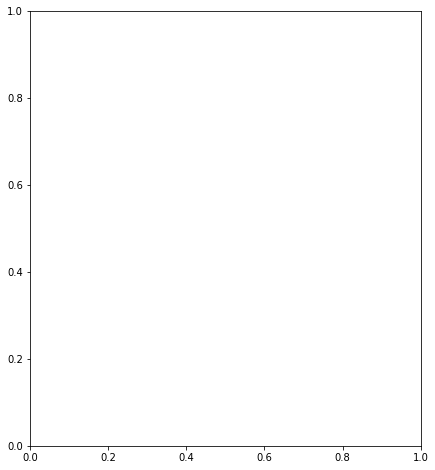

In [101]:
plotFramesPerVideo(number_of_frames_video_11, number_of_frames_video_12, number_of_frames_video_13, number_of_frames_video_14, number_of_frames_video_15)

In [102]:
# Shape of the images 
# Run only first time
'''
shape_of_frame_video_11 = images[0].shape
shape_of_frame_video_12 = images[number_of_frames_video_11].shape
shape_of_frame_video_13 = images[number_of_frames_video_11+number_of_frames_video_12].shape
shape_of_frame_video_14 = images[number_of_frames_video_11+number_of_frames_video_12+number_of_frames_video_13].shape
shape_of_frame_video_15 = images[number_of_frames_video_11+number_of_frames_video_12+number_of_frames_video_13+\
                                number_of_frames_video_14].shape
print('shape of the images in tool_video_11 is: '+str(shape_of_frame_video_11))
print('shape of the images in tool_video_12 is: '+str(shape_of_frame_video_12))
print('shape of the images in tool_video_13 is: '+str(shape_of_frame_video_13))
print('shape of the images in tool_video_14 is: '+str(shape_of_frame_video_14))
print('shape of the images in tool_video_15 is: '+str(shape_of_frame_video_15))
'''

shape of the images in tool_video_11 is: (480, 854, 3)
shape of the images in tool_video_12 is: (438, 780, 3)
shape of the images in tool_video_13 is: (480, 854, 3)
shape of the images in tool_video_14 is: (480, 854, 3)
shape of the images in tool_video_15 is: (480, 854, 3)


In [82]:
width = 224
height = 224
#data_set_X = resizeImages(images,width,height); # uncomment when you require to change the shape of images

### Display few images

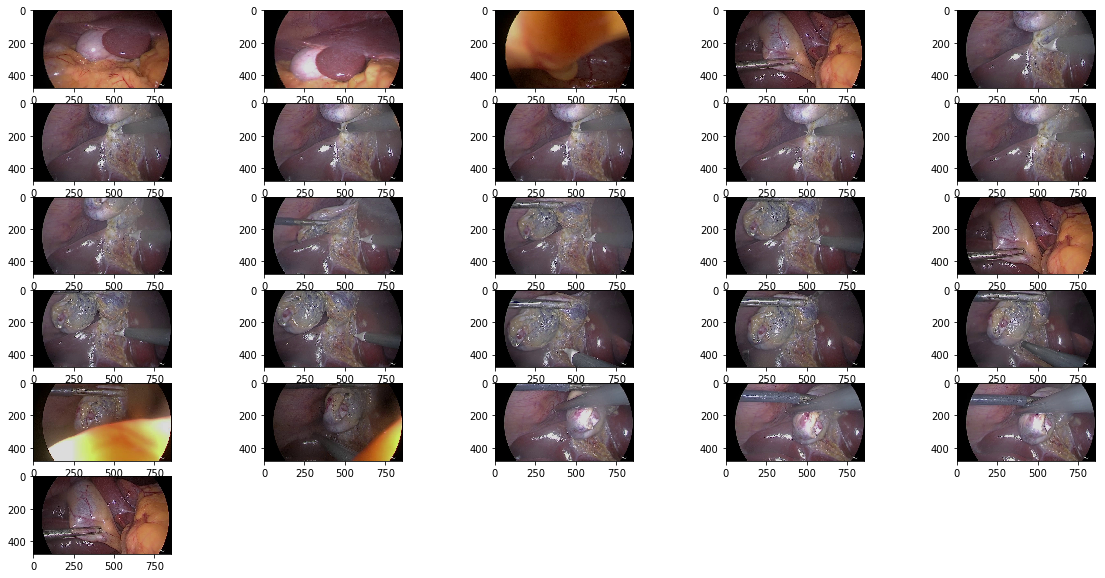

In [104]:
'''
rows = 5
columns=5
plt.figure(figsize=(20,10))
max_images = rows * columns;
step = int(len(images)/max_images)
image_list = np.arange(0,len(images),step)
i=0
for idx in range(len(image_list)):
    plt.subplot(max_images / columns + 1, columns, i+1)
    plt.imshow(images[idx])
    i+=1
'''

### Combined all testing labels

In [83]:
data_set_y = getCombinedDataFrames(tool_video_11_df, tool_video_12_df, tool_video_13_df, tool_video_14_df, tool_video_15_df)

In [84]:
print("shape of testing labels: "+str(data_set_y.shape))

shape of testing labels: (12541, 7)


### Save testing data set in .h5 file

In [85]:
h5filename = 'test_surgery_tool.h5'
#saveData(filepath, h5filename, data_set_X, data_set_y, data_type = 'testing'); # Run only first ti

### Visualize the presence of tools in video

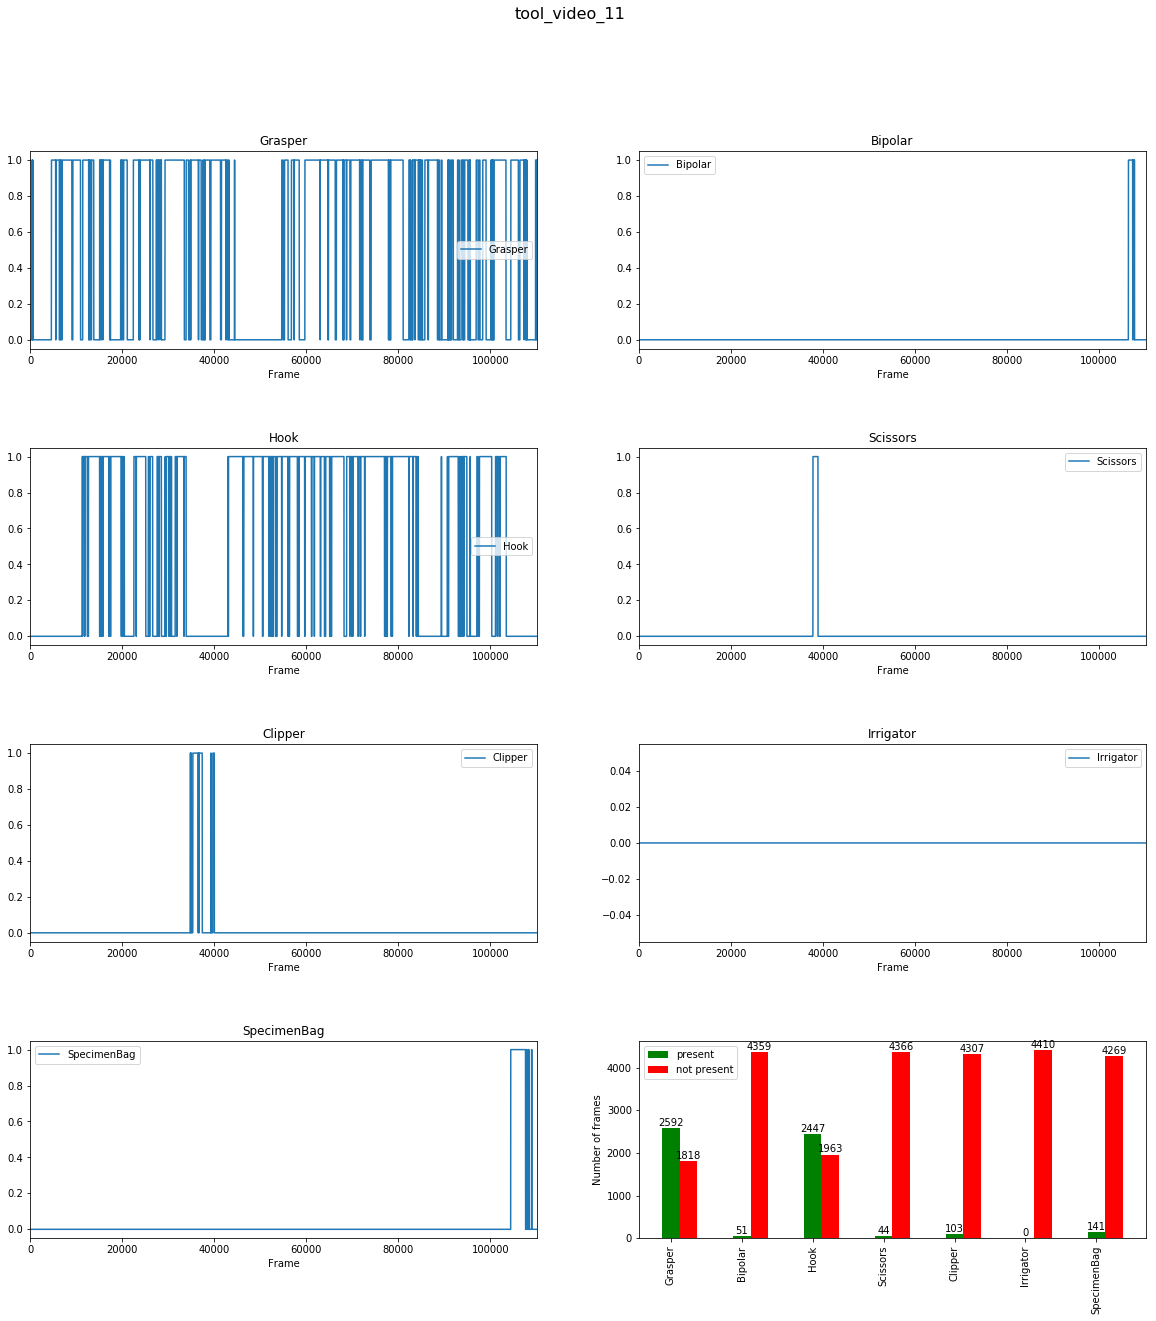

In [106]:
tool_video_11_present, tool_video_11_not_present =\
        plotToolsPresence(tool_video_11_df, number_of_frames_video_11, title='tool_video_11')

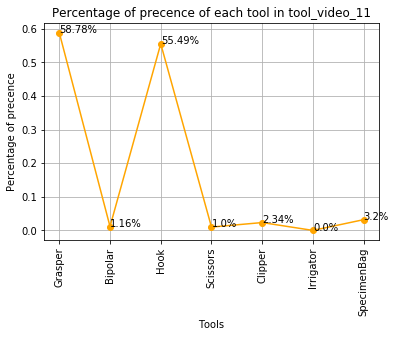

In [111]:
percentage_presence_tool_video_11 =\
        plotPercentageOfToolPresence(tool_video_11_present, number_of_frames_video_11, title = 'tool_video_11')

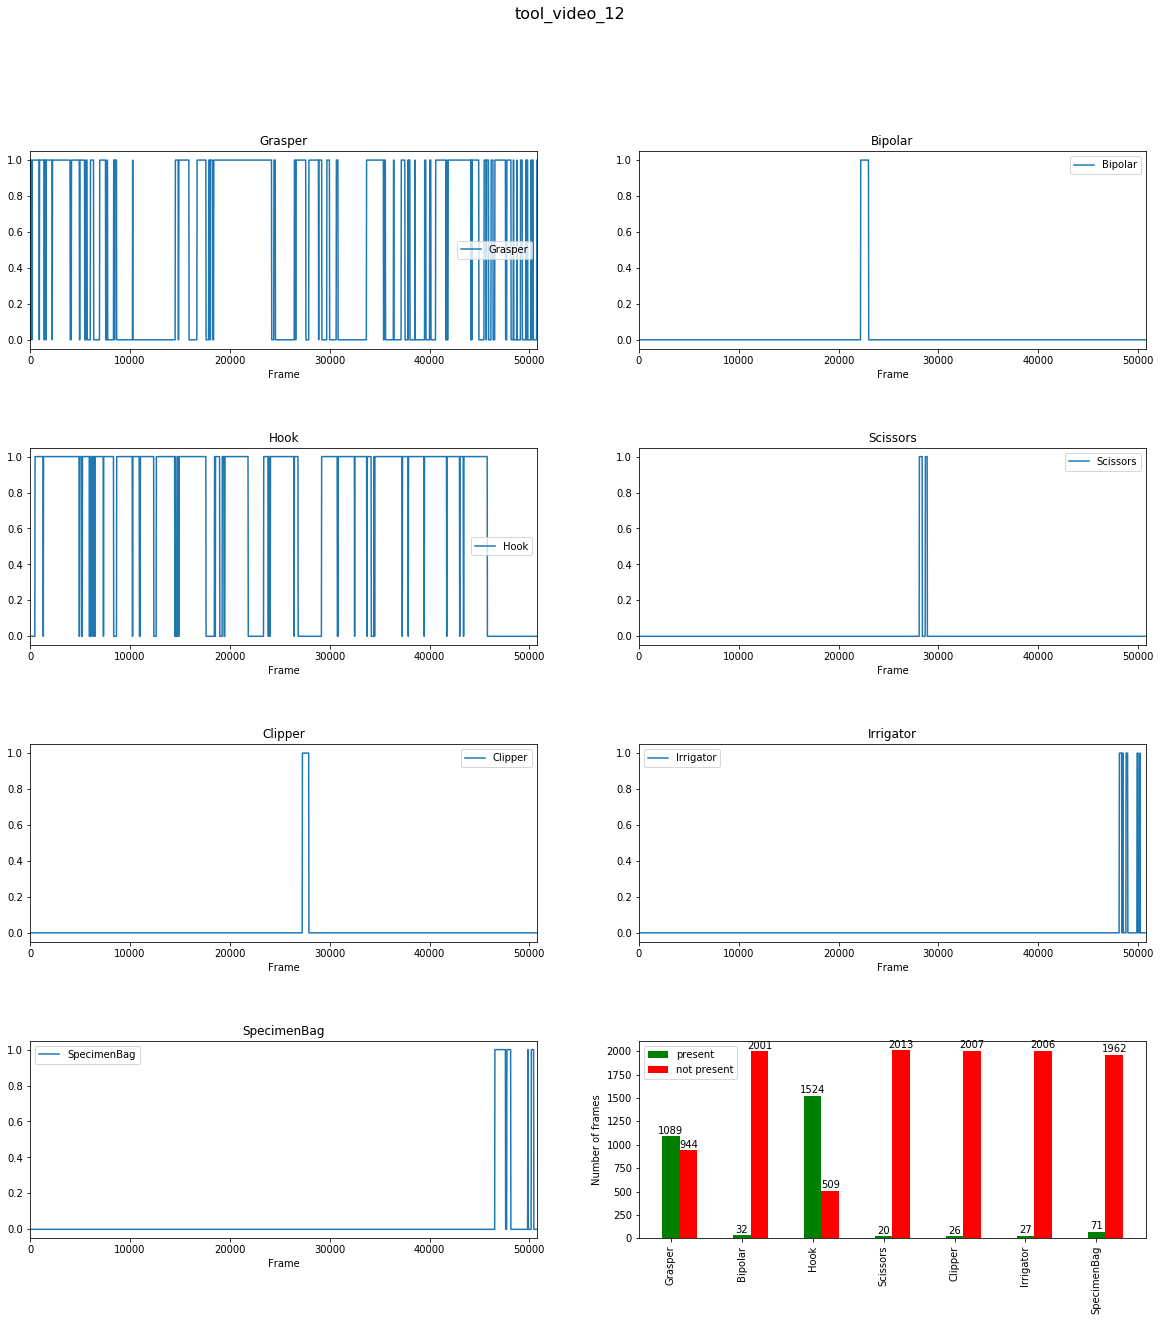

In [107]:
tool_video_12_present, tool_video_12_not_present =\
        plotToolsPresence(tool_video_12_df, number_of_frames_video_12, title='tool_video_12')

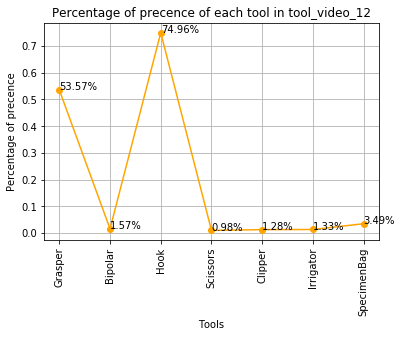

In [112]:
percentage_presence_tool_video_12 =\
        plotPercentageOfToolPresence(tool_video_12_present, number_of_frames_video_12, title = 'tool_video_12')

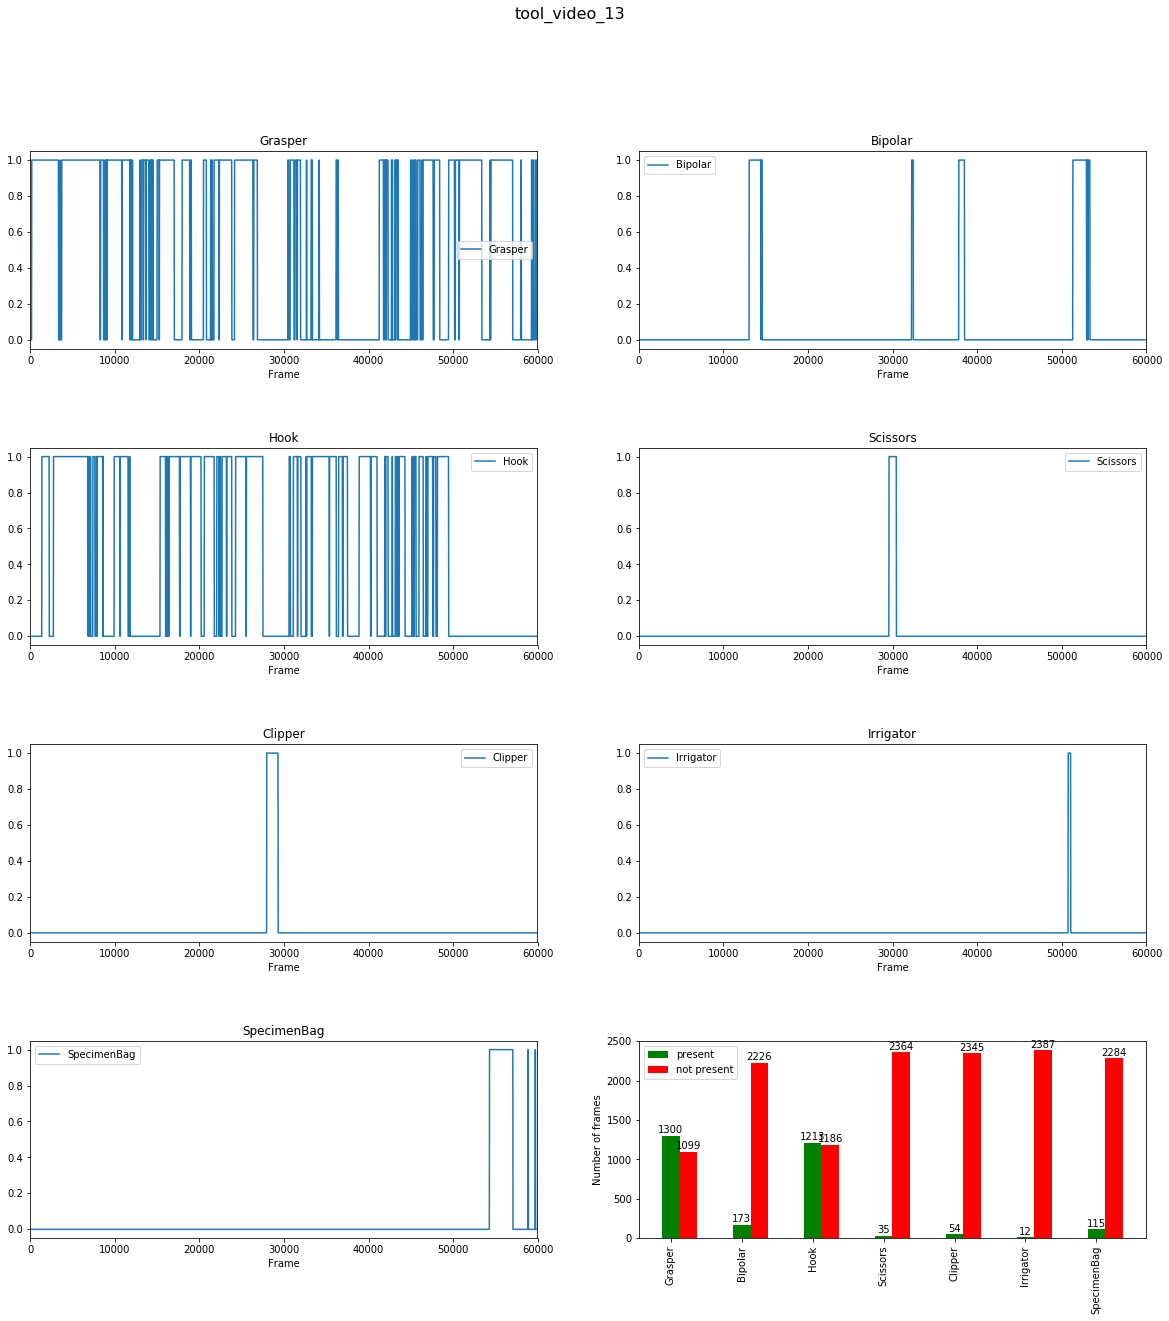

In [108]:
tool_video_13_present, tool_video_13_not_present =\
        plotToolsPresence(tool_video_13_df, number_of_frames_video_13, title='tool_video_13')

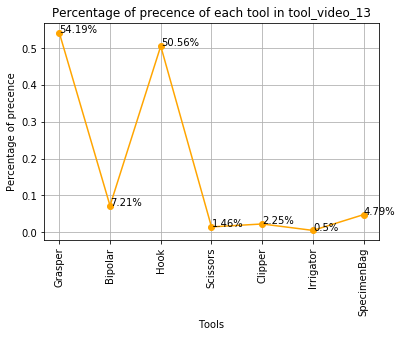

In [113]:
percentage_presence_tool_video_13 =\
        plotPercentageOfToolPresence(tool_video_13_present, number_of_frames_video_13, title = 'tool_video_13')

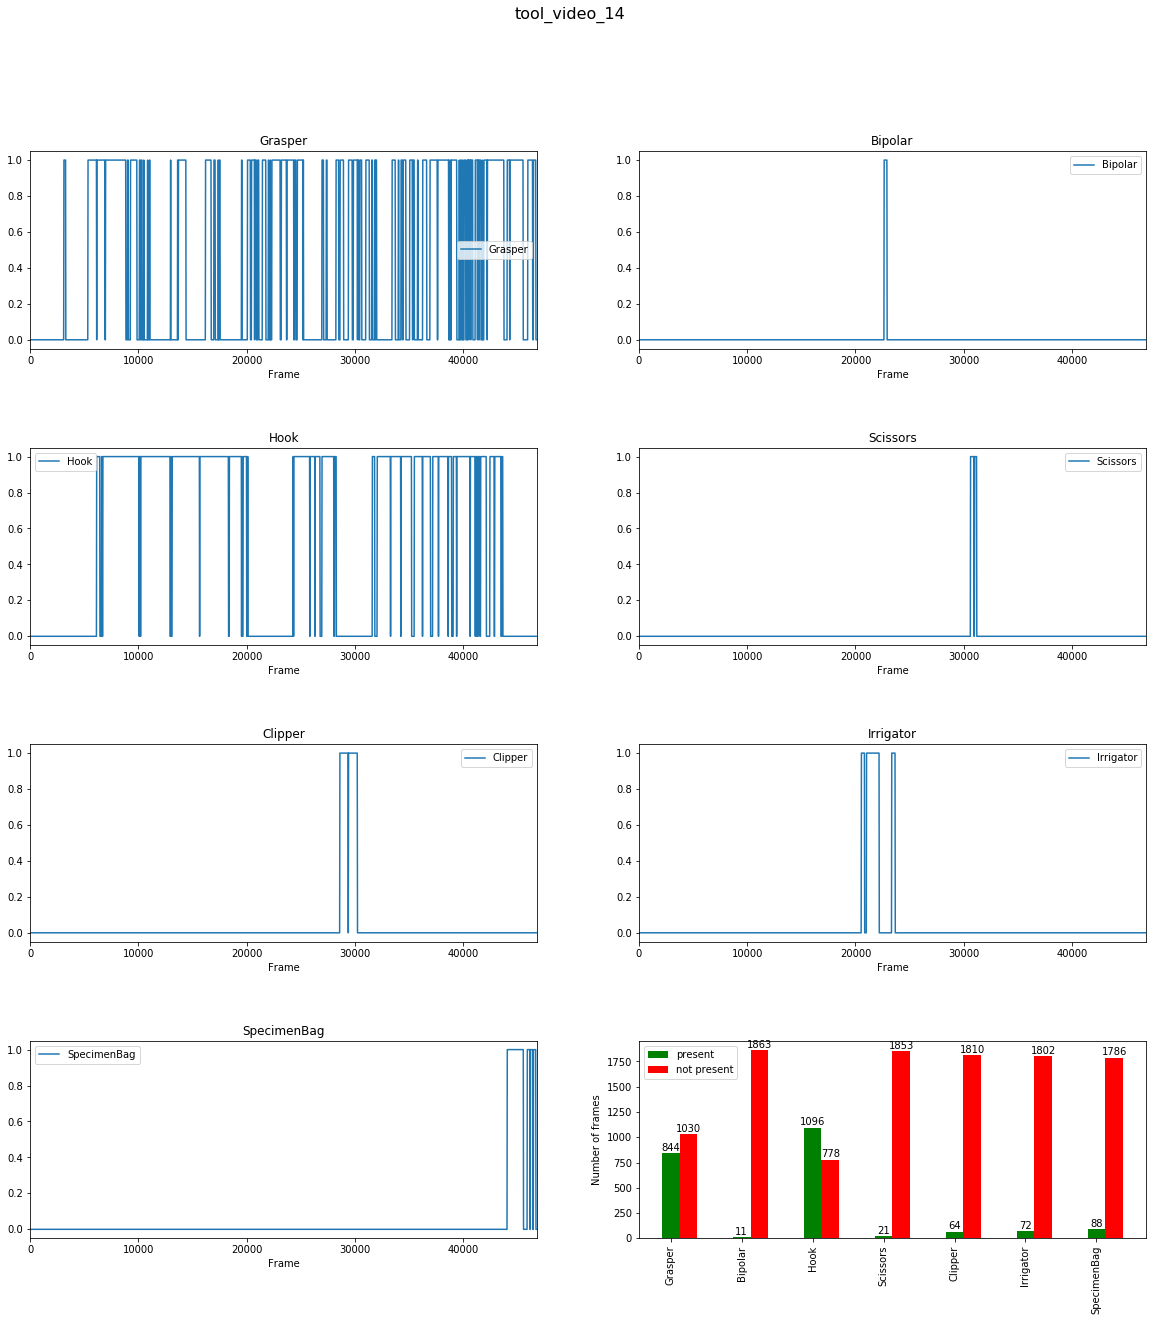

In [109]:
tool_video_14_present, tool_video_14_not_present =\
        plotToolsPresence(tool_video_14_df, number_of_frames_video_14, title='tool_video_14')

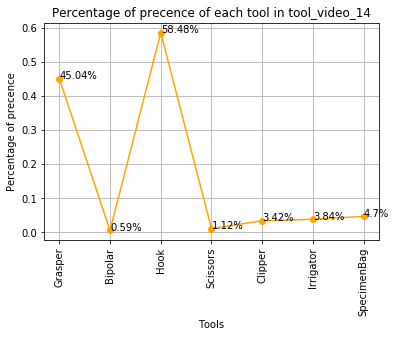

In [114]:
percentage_presence_tool_video_14 =\
        plotPercentageOfToolPresence(tool_video_14_present, number_of_frames_video_14, title = 'tool_video_14')

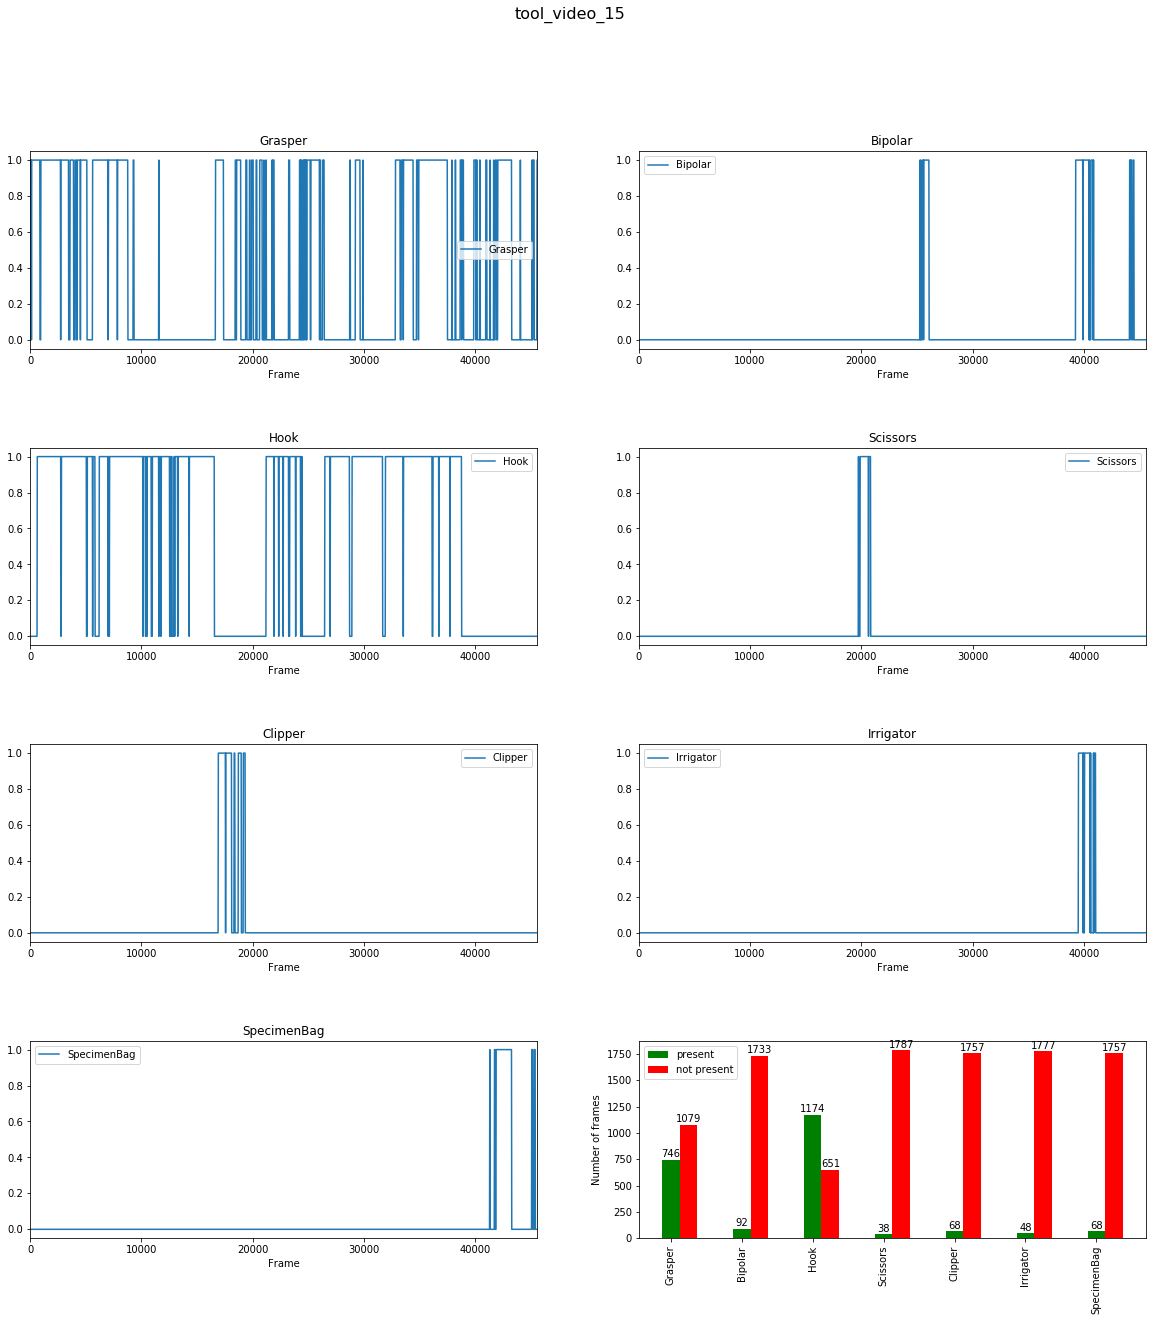

In [110]:
tool_video_15_present, tool_video_15_not_present =\
        plotToolsPresence(tool_video_15_df, number_of_frames_video_15, title='tool_video_15')

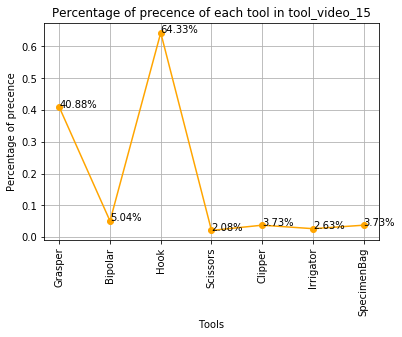

In [115]:
percentage_presence_tool_video_15 =\
        plotPercentageOfToolPresence(tool_video_15_present, number_of_frames_video_15, title = 'tool_video_15')

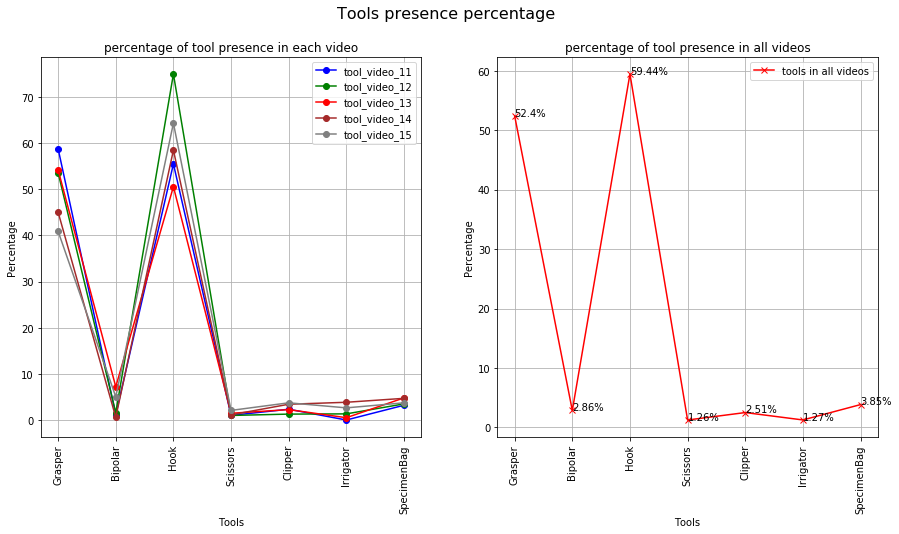

In [116]:
percentage_presence_tool_video_list = [percentage_presence_tool_video_11, percentage_presence_tool_video_12,\
                                       percentage_presence_tool_video_13, percentage_presence_tool_video_14,\
                                       percentage_presence_tool_video_15]
colors = ['blue', 'green', 'red', 'brown', 'gray']
legend_list = ['tool_video_11', 'tool_video_12', 'tool_video_13', 'tool_video_14', 'tool_video_15']
tool_video_present_list = [tool_video_11_present, tool_video_12_present, tool_video_13_present, tool_video_14_present,\
                           tool_video_15_present]
total_number_of_frames = number_of_frames_video_11 + number_of_frames_video_12 + number_of_frames_video_13+\
        number_of_frames_video_14 + number_of_frames_video_15


#percentage_presence_of_tool_in_all_videos=\
        #plotCombinedPercentageOfToolPresence(percentage_presence_tool_video_list, colors, legend_list, tool_video_present_list,\
                                             #total_number_of_frames)
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,7))
fig.suptitle('Tools presence percentage', fontsize=16)
tool_names = ['Grasper', 'Bipolar', 'Hook', 'Scissors', 'Clipper', 'Irrigator', 'SpecimenBag']
x_axis = np.arange(len(tool_names))
plt.subplot(121)
for pptv, clr in zip(percentage_presence_tool_video_list, colors):
    #print(clr)
    #print(pptv)
    plt.plot(x_axis, pptv*100, marker='o', color =clr)
plt.legend(legend_list)
plt.xlabel('Tools')
plt.ylabel('Percentage')
plt.title('percentage of tool presence in each video')
plt.xticks(x_axis,tool_names, rotation='vertical')
plt.grid()
## for all videos
tool_present_in_all_videos = [sum(x) for x in zip(*tool_video_present_list)]
percentage_presence_of_tool_in_all_videos = np.divide(tool_present_in_all_videos,total_number_of_frames) * 100
plt.subplot(122)
plt.plot(x_axis, percentage_presence_of_tool_in_all_videos, marker='x', color ='red')
plt.legend(['tools in all videos'])
plt.xlabel('Tools')
plt.ylabel('Percentage')
plt.title('percentage of tool presence in all videos')
plt.xticks(x_axis,tool_names, rotation='vertical')
for i,j in zip(x_axis,percentage_presence_of_tool_in_all_videos):
    plt.annotate(str(round(j,2))+'%',xy=(i,j))
plt.grid()

### Model Training prepration

#### Load the training data

In [24]:
filepath = 'data/m2cai16-tool/train_dataset/'
h5filename = 'train_surgery_tool.h5'
train_set_X_orig, train_set_y_orig = loadData(filepath, h5filename, data_type='training')

In [25]:
print('Shape of training features: '+str(train_set_X_orig.shape))
print('Shape of training multilebels: '+str(train_set_y_orig.shape))
print('Number of features: '+str(train_set_X_orig.shape[0]))
print('Shape of training tool images: '+str((train_set_X_orig.shape[1],train_set_X_orig.shape[2],train_set_X_orig.shape[3])))

Shape of training features: (23287, 224, 224, 3)
Shape of training multilebels: (23287, 7)
Number of features: 23287
Shape of training tool images: (224, 224, 3)


In [86]:
filepath = 'data/m2cai16-tool/test_dataset/'
h5filename = 'test_surgery_tool.h5'
test_set_X_orig, test_set_y_orig = loadData(filepath, h5filename, data_type='testing')

In [87]:
print('Shape of testing features: '+str(test_set_X_orig.shape))
print('Shape of testing multilebels: '+str(test_set_y_orig.shape))
print('Number of testing features: '+str(test_set_X_orig.shape[0]))
print('Shape of testing tool images: '+str((test_set_X_orig.shape[1],test_set_X_orig.shape[2],test_set_X_orig.shape[3])))

Shape of testing features: (12541, 224, 224, 3)
Shape of testing multilebels: (12541, 7)
Number of testing features: 12541
Shape of testing tool images: (224, 224, 3)


In [44]:
X_train = cv2.normalize(train_set_X_orig[0,:,:,:], 1, 0, cv2.NORM_MINMAX)

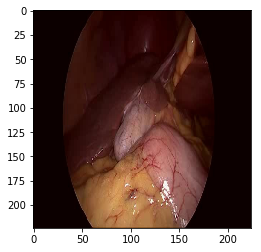

In [45]:
plt.imshow(train_set_X_orig[0,:,:,:])

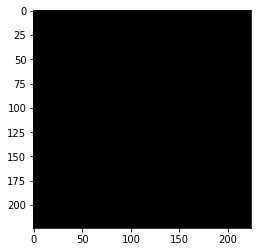

In [47]:
plt.imshow(X_train)

In [48]:
# Normalize image vectors
X_train = train_set_X_orig[0,:,:,:]/255.
X_test = test_set_X_orig[0:,:,:]/255.

MemoryError: 

In [50]:
print(X_train.shape)

(224, 224, 3)


In [12]:
import tensorflow as tf
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [14]:
def identity_block(X, f, filters, stage, block):
    """
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = (f,f), strides = (1,1), padding= 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters = F3, kernel_size = (1,1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [17]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X

    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path
    X = Conv2D(F2,(f, f),strides=(1, 1),padding='same',name=conv_name_base +'2b',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+'2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(F3,(1,1),strides=(1,1),padding='valid',name=conv_name_base+'2c',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+'2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(F3,(1,1),strides=(s,s),padding='valid',name=conv_name_base+'1',kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3,name=bn_name_base+'1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [19]:
def ResNet50(input_shape = (224, 224, 3), classes = 7):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER
    
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    
    # Stage 3
    X = convolutional_block(X, f=3, filters= [128, 128, 512], stage = 3, block='a', s=2)
    X = identity_block(X, f=3, filters= [128, 128, 512], stage = 3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage =3, block='d')

    # Stage 4
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block ='f')

    # Stage 5
    X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage =5, block='c')

    # AVGPOOL
    X = AveragePooling2D((2,2),name='avg_pool')(X)
    
    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [21]:
model = ResNet50(input_shape = (224, 224, 3), classes = 7)

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(train_set_X_orig, train_set_y_orig, epochs = 2, batch_size = 32)

Epoch 1/2
23287/23287 [==============================] - 35251s 2s/step - loss: 2.1426 - acc: 0.4767
Epoch 2/2
23287/23287 [==============================] - 35049s 2s/step - loss: 1.4528 - acc: 0.5309


In [88]:
preds = model.evaluate(test_set_X_orig, test_set_y_orig)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

12541/12541 [==============================] - 7188s 573ms/step
Loss = 1.601613240135162
Test Accuracy = 0.31911330834861656


In [89]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

activation_76 (Activation)      (None, 14, 14, 256)  0           bn4a_branch2b[0][0]              
__________________________________________________________________________________________________
res4a_branch2c (Conv2D)         (None, 14, 14, 1024) 263168      activation_76[0][0]              
__________________________________________________________________________________________________
res4a_branch1 (Conv2D)          (None, 14, 14, 1024) 525312      activation_74[0][0]              
__________________________________________________________________________________________________
bn4a_branch2c (BatchNormalizati (None, 14, 14, 1024) 4096        res4a_branch2c[0][0]             
__________________________________________________________________________________________________
bn4a_branch1 (BatchNormalizatio (None, 14, 14, 1024) 4096        res4a_branch1[0][0]              
__________________________________________________________________________________________________
add_25 (Ad

avg_pool (AveragePooling2D)     (None, 3, 3, 2048)   0           activation_101[0][0]             
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 18432)        0           avg_pool[0][0]                   
__________________________________________________________________________________________________
fc7 (Dense)                     (None, 7)            129031      flatten_2[0][0]                  
Total params: 23,716,743
Trainable params: 23,663,623
Non-trainable params: 53,120
__________________________________________________________________________________________________
